In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
from math import *
import seaborn as sns
from sklearn.cluster import DBSCAN
#from mpl_toolkits.basemap import Basemap
import pickle

In [529]:
scipy.__version__


'0.19.1'

In [518]:
pd.__version__

u'0.23.1'

In [3]:
sns.__version__

'0.8.1'

In [528]:
np.__version__

'1.13.3'

In [519]:
pickle.HIGHEST_PROTOCOL


2

In [4]:
import sklearn
sklearn.__version__

'0.19.0'

In [5]:
pickle.__version__

'$Revision: 72223 $'

### Malpractice Data:

In [6]:
data = pd.read_csv('NpdbPublicUseDataCsv/NPDB1710.CSV',delimiter=',',low_memory=False)

In [7]:
## Clean the payment column so it's numeric:
data["PAYMENT"].replace('[\$,]', '', regex=True, inplace=True)

In [8]:
data["TOTALPMT"].replace('[\$,]', '', regex=True, inplace=True)

In [9]:
data["FUNDPYMT"].replace('[\$,]', '', regex=True, inplace=True)

In [10]:
type(data["ORIGYEAR"][0])

numpy.int64

In [11]:
data.columns

Index([u'SEQNO', u'RECTYPE', u'REPTYPE', u'ORIGYEAR', u'WORKSTAT', u'WORKCTRY',
       u'HOMESTAT', u'HOMECTRY', u'LICNSTAT', u'LICNFELD', u'PRACTAGE',
       u'GRAD', u'ALGNNATR', u'ALEGATN1', u'ALEGATN2', u'OUTCOME', u'MALYEAR1',
       u'MALYEAR2', u'PAYMENT', u'TOTALPMT', u'PAYNUMBR', u'NUMBPRSN',
       u'PAYTYPE', u'PYRRLTNS', u'PTAGE', u'PTGENDER', u'PTTYPE', u'AAYEAR',
       u'AACLASS1', u'AACLASS2', u'AACLASS3', u'AACLASS4', u'AACLASS5',
       u'BASISCD1', u'BASISCD2', u'BASISCD3', u'BASISCD4', u'BASISCD5',
       u'AALENTYP', u'AALENGTH', u'AAEFYEAR', u'AASIGYR', u'TYPE', u'PRACTNUM',
       u'ACCRRPTS', u'NPMALRPT', u'NPLICRPT', u'NPCLPRPT', u'NPPSMRPT',
       u'NPDEARPT', u'NPEXCRPT', u'NPGARPT', u'NPCTMRPT', u'FUNDPYMT'],
      dtype='object')

In [12]:
data

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,WORKCTRY,HOMESTAT,HOMECTRY,LICNSTAT,LICNFELD,...,ACCRRPTS,NPMALRPT,NPLICRPT,NPCLPRPT,NPPSMRPT,NPDEARPT,NPEXCRPT,NPGARPT,NPCTMRPT,FUNDPYMT
0,1,A,301,1991,OK,NaN,NaN,NaN,OK,10,...,0,0,2,0,0,0,0,0,0,NaN
1,2,A,301,1991,OK,NaN,NaN,NaN,OK,10,...,0,0,7,0,0,0,1,0,0,NaN
2,4,A,301,1991,MA,NaN,NaN,NaN,MA,15,...,0,1,1,0,0,0,2,0,0,NaN
3,6,A,301,1990,OK,NaN,NaN,NaN,OK,10,...,0,0,2,0,0,0,0,0,0,NaN
4,8,A,301,1990,OK,NaN,NaN,NaN,OK,10,...,0,0,6,0,1,0,0,0,0,NaN
5,9,A,301,1990,OK,NaN,OK,NaN,OK,10,...,0,1,3,0,0,0,0,0,0,NaN
6,12,A,301,1990,VA,NaN,IL,NaN,VA,10,...,0,0,10,0,0,0,0,0,0,NaN
7,13,A,301,1990,KY,NaN,KY,NaN,DC,10,...,0,0,1,0,0,0,0,0,0,NaN
8,14,A,301,1990,OH,NaN,NaN,NaN,OH,30,...,0,0,1,0,0,0,0,0,0,NaN
9,15,A,301,1990,OH,NaN,NaN,NaN,OH,30,...,0,0,3,0,0,0,0,0,0,NaN


### PAYOUT CALCULATOR:

#### First we do some data cleaning. Get all relevant columns, drop all NA ones, use a random forest algo to train, save model as a pickle and implement into flask website.

In [13]:
keep_columns = ['RECTYPE',
                'ORIGYEAR',
                'WORKSTAT',
                'LICNFELD',
                'PRACTAGE',
                'ALGNNATR',
                'ALEGATN1',
                'ALEGATN2',
                'OUTCOME',
                'PAYTYPE',
                'PTAGE',
                'PTGENDER',
                'PTTYPE',
                'PAYMENT']

In [14]:
data2017 = pd.DataFrame(data[keep_columns][data[keep_columns]['ORIGYEAR']==2017].values,columns=keep_columns)

In [15]:
data2017_clean = pd.DataFrame(data2017[data2017['PAYMENT'].notna()].values,columns=keep_columns)
data2017_clean['PAYMENT'] = data2017_clean['PAYMENT'].astype(float,inplace=True)
data2017_clean

,RECTYPE,ORIGYEAR,WORKSTAT,LICNFELD,PRACTAGE,ALGNNATR,ALEGATN1,ALEGATN2,OUTCOME,PAYTYPE,PTAGE,PTGENDER,PTTYPE,PAYMENT
0,P,2017,NM,10,40,60,201,NaN,8,S,40,F,I,6750000.0
1,P,2017,NM,10,30,1,101,NaN,9,S,60,M,O,495000.0
2,P,2017,NM,10,40,60,101,200,4,S,20,M,I,8750.0
3,P,2017,KY,130,40,30,327,NaN,9,S,70,M,I,335000.0
4,P,2017,NaN,10,30,1,101,NaN,6,S,50,F,B,495000.0
5,P,2017,AK,30,60,1,101,NaN,5,S,20,F,O,37500.0
6,P,2017,GA,10,60,60,306,NaN,6,S,50,M,O,395000.0
7,P,2017,MI,30,40,60,706,NaN,3,S,60,F,O,17500.0
8,P,2017,PA,350,40,60,306,NaN,2,S,50,F,O,47500.0
9,P,2017,NaN,10,60,20,303,NaN,7,S,70,M,I,305000.0


In [16]:
data2017_clean.iloc[0]['RECTYPE']

'P'

In [201]:
## one hot encoding
new_columns = {}
new_columns_list = []

i = 0
for el in data2017_clean.columns[:-1]:
    list_titles = np.unique(data2017_clean[el][data2017_clean[el].notna()].values)
    #print el, list_titles
    if len(list_titles)>2:
        print el, list_titles
        for title in list_titles:
            try:
                title_ = int(title)
            except:
                title_ = title
            new_columns[el+'_'+str(title_)]=i
            new_columns_list.append(el+'_'+str(title_))
            i += 1
        new_columns[el+'_unknown']=i
        new_columns_list.append(el+'_unknown')
        i += 1
        
print new_columns
col_count = len(new_columns)

data2017_encoded = []
for ii in range(len(data2017_clean)):
    new_row = np.zeros(col_count)
    for el in data2017_clean.columns[:-1]:
        title = data2017_clean.iloc[ii][el]
        try:
            title_ = int(title)
        except:
            title_ = title
        if el+'_'+str(title_) in new_columns:
            new_row[new_columns[el+'_'+str(title_)]] = 1
        elif el+'_unknown' in new_columns:
            new_row[new_columns[el+'_unknown']] = 1
    data2017_encoded.append(new_row)
    

WORKSTAT ['AE' 'AK' 'AL' 'AP' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MP' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']
LICNFELD [10 15 20 25 30 35 50 70 100 110 120 130 140 141 142 150 160 176 200 211
 250 280 300 350 371 400 405 410 420 430 440 460 503 530 551 600 601 603
 609 613 618 621 624 627 636 642 647 651 652 658 661 663 668 699]
PRACTAGE [10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0]
ALGNNATR [1.0 10.0 20.0 30.0 40.0 50.0 60.0 70.0 80.0 90.0 100.0]
ALEGATN1 [100.0 101.0 102.0 103.0 104.0 105.0 106.0 107.0 108.0 109.0 110.0 111.0
 112.0 113.0 200.0 201.0 202.0 203.0 300.0 301.0 302.0 303.0 304.0 305.0
 306.0 307.0 308.0 309.0 310.0 311.0 312.0 314.0 315.0 316.0 317.0 318.0
 319.0 320.0 321.0 322.0 323.0 324.0 325.0 326.0 327.0 328.0 329.0 330.0
 332.0 333.0 334.0 400.0 401.0 402.0 404.0 500.0 501.0 502.0 503.0 

In [197]:
df2017_encoded = pd.DataFrame(data2017_encoded,columns=new_columns_list)

In [210]:
print new_columns["PTGENDER_F"]
new_columns_list[314]

314


'PTGENDER_F'

In [520]:
pickle.dump(new_columns, open("estimator_columns.pck", "wb"),protocol=2)

In [215]:
el_ex = u'ALEGATN1_103'
title_ex = el_ex.split('_')
print new_columns_list[216]
new_columns[title_ex[0]+"_unknown"]

ALEGATN1_unknown


216

In [220]:
int(round(234346457.3453,-2))

234346500

In [198]:
df2017_encoded


,WORKSTAT_AE,WORKSTAT_AK,WORKSTAT_AL,WORKSTAT_AP,WORKSTAT_AR,WORKSTAT_AZ,WORKSTAT_CA,WORKSTAT_CO,WORKSTAT_CT,WORKSTAT_DC,...,PTAGE_unknown,PTGENDER_F,PTGENDER_M,PTGENDER_U,PTGENDER_unknown,PTTYPE_B,PTTYPE_I,PTTYPE_O,PTTYPE_U,PTTYPE_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


/home/derya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


score
0.870292786214
Feature ranking:
1. feature 292 (0.067405) OUTCOME_8
2. feature 16 (0.048020) WORKSTAT_IL
3. feature 120 (0.044281) PRACTAGE_unknown
4. feature 304 (0.036304) PTAGE_10
5. feature 291 (0.035251) OUTCOME_7
6. feature 287 (0.022194) OUTCOME_3
7. feature 47 (0.018896) WORKSTAT_TX
8. feature 115 (0.018880) PRACTAGE_40
9. feature 134 (0.018667) ALEGATN1_101
10. feature 302 (0.017419) PTAGE_0
11. feature 121 (0.017356) ALGNNATR_1
12. feature 157 (0.016023) ALEGATN1_306
13. feature 319 (0.015436) PTTYPE_I
14. feature 162 (0.014280) ALEGATN1_311
15. feature 57 (0.013931) LICNFELD_10
16. feature 305 (0.013784) PTAGE_20
17. feature 307 (0.013752) PTAGE_40
18. feature 114 (0.013742) PRACTAGE_30
19. feature 116 (0.013697) PRACTAGE_50
20. feature 308 (0.013166) PTAGE_50
21. feature 318 (0.012829) PTTYPE_B
22. feature 315 (0.012561) PTGENDER_M
23. feature 320 (0.012234) PTTYPE_O
24. feature 8 (0.011692) WORKSTAT_CT
25. feature 293 (0.011477) OUTCOME_9
26. feature 314 (0.011092) P

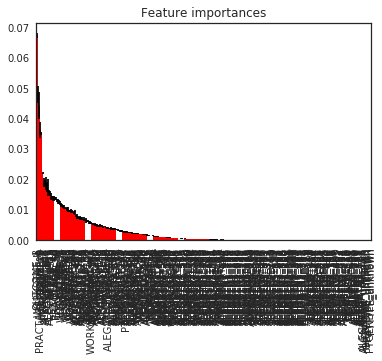

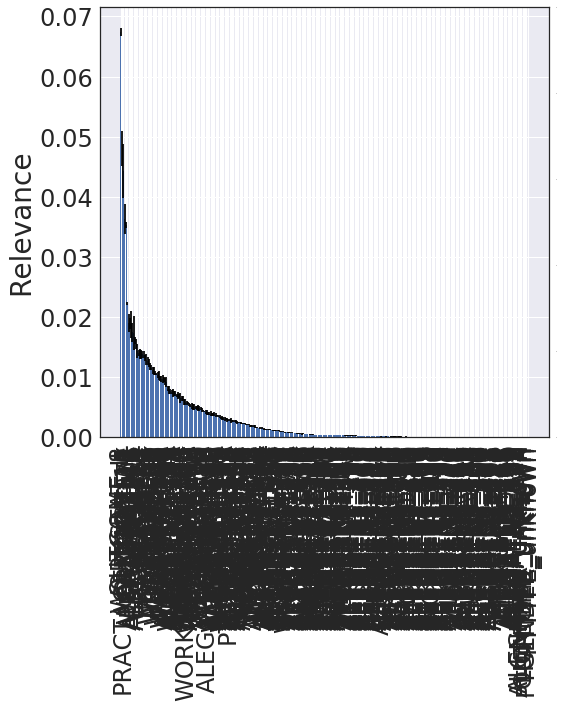

In [521]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=120, max_depth=120)
features_list = new_columns_list
X = df2017_encoded[features_list]
y = data2017_clean[['PAYMENT']]
forest.fit(X,y)
pickle.dump(forest, open("estimator_model.pck", "wb"),protocol=2)
y_predict = forest.predict(X)
mae_model = np.sum(abs(y.values.T-y_predict))/len(y_predict)
mae_model
print "score"
print forest.score(X,y)

importances = forest.feature_importances_
std = scipy.stats.sem([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], features_list[indices[f]]))

# Plot the feature importances of the forest
features = [features_list[i] for i in indices]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features,rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()


sns.set_style("darkgrid")

fig, ax1 = plt.subplots(figsize=(8,10))
ax1.bar(range(X.shape[1]),importances[indices],yerr=std[indices], align="center") #,color=current_palette[6]
#ax1.set_xlabel('Features',fontsize=30)
plt.xticks(range(X.shape[1]), features,rotation='vertical')
ax1.tick_params(axis='x',labelsize=24)
ax1.set_ylabel('Relevance',fontsize=28)
ax1.tick_params(axis='y',labelsize=24)

sns.set_style("white")
ax2 = ax1.twinx()
#ax2.plot(years,[pay/1000. for pay in payments],color=current_palette[6],marker='o',markersize=12,linewidth=4)
#ax2.set_ylabel('Average Payout Per Case [$1000]',fontsize=32)
ax2.tick_params(axis='y',labelsize=0) #,labelcolor=current_palette[6]
#ax2.set_ylim(100,350)
fig.tight_layout()
#sns.despine()

#plt.savefig('total_numbers_costs_across_us.jpg',dpi=100)
plt.show()

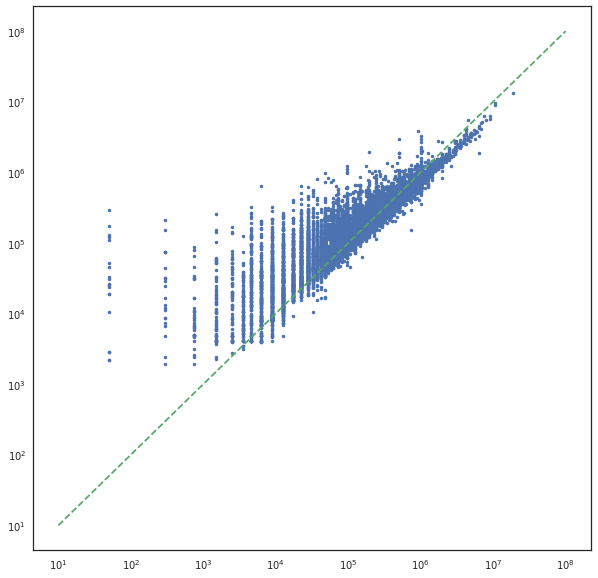

LinregressResult(slope=0.73015272029790212, intercept=84201.385702249041, rvalue=0.95132208621514147, pvalue=nan, stderr=nan)

In [244]:
plt.figure(figsize=(10,10))
plt.plot(y,y_predict,marker='.',linewidth=0)
plt.plot([1e1,1e8],[1e1,1e8],linestyle='--')
plt.yscale('log')
plt.xscale('log')
plt.show()

scipy.stats.linregress(y.values.T,y_predict)

In [246]:
mae_model = np.sum(abs(y.values.T-y_predict))/len(y_predict)
mae_model

91376.611550578891

### Census/States Data:

In [47]:
#state_pop = pd.read_excel('nst-est2016-01.xlsx',header=3,skip_footer=5)
col_dtype = {'Census': str, 
             'Estimates Base': str, 
             '2010': int,
             '2011': int,
             '2012': int,
             '2013': int,
             '2014': int,
             '2015': int,
             '2016': int,
             'State Abb': str,
            }
state_pop = pd.read_csv('nst-est2016-01.csv',delimiter=',',header=3,skipfooter=5,index_col=0) #,dtype=col_dtype)

new_index_list = {}
for s_label in state_pop.index:
    try:
        if s_label[0]=='.':
            new_index_list.update({s_label: s_label[1:]})
        else:
            new_index_list.update({s_label: s_label})
    except:
        new_index_list.update({s_label: 'unknown'})

state_pop.rename(index=new_index_list,inplace=True)

/home/derya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [48]:
new_index_list

{'.Alabama': 'Alabama',
 '.Alaska': 'Alaska',
 '.Arizona': 'Arizona',
 '.Arkansas': 'Arkansas',
 '.California': 'California',
 '.Colorado': 'Colorado',
 '.Connecticut': 'Connecticut',
 '.Delaware': 'Delaware',
 '.District of Columbia': 'District of Columbia',
 '.Florida': 'Florida',
 '.Georgia': 'Georgia',
 '.Hawaii': 'Hawaii',
 '.Idaho': 'Idaho',
 '.Illinois': 'Illinois',
 '.Indiana': 'Indiana',
 '.Iowa': 'Iowa',
 '.Kansas': 'Kansas',
 '.Kentucky': 'Kentucky',
 '.Louisiana': 'Louisiana',
 '.Maine': 'Maine',
 '.Maryland': 'Maryland',
 '.Massachusetts': 'Massachusetts',
 '.Michigan': 'Michigan',
 '.Minnesota': 'Minnesota',
 '.Mississippi': 'Mississippi',
 '.Missouri': 'Missouri',
 '.Montana': 'Montana',
 '.Nebraska': 'Nebraska',
 '.Nevada': 'Nevada',
 '.New Hampshire': 'New Hampshire',
 '.New Jersey': 'New Jersey',
 '.New Mexico': 'New Mexico',
 '.New York': 'New York',
 '.North Carolina': 'North Carolina',
 '.North Dakota': 'North Dakota',
 '.Ohio': 'Ohio',
 '.Oklahoma': 'Oklahoma',
 '

In [49]:
state_pop

,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,State Abb
United States,"308,745,538","308,758,105","309,348,193","311,663,358","313,998,379","316,204,908","318,563,456","320,896,618","323,127,513",US
Northeast,"55,317,240","55,318,353","55,388,056","55,632,766","55,829,059","55,988,771","56,116,791","56,184,737","56,209,510",NE
Midwest,"66,927,001","66,929,825","66,978,602","67,153,331","67,332,320","67,543,948","67,726,368","67,838,387","67,941,429",MW
South,"114,555,744","114,563,005","114,863,114","116,061,801","117,299,171","118,424,320","119,696,311","121,039,206","122,319,574",SO
West,"71,945,553","71,946,922","72,118,421","72,815,460","73,537,829","74,247,869","75,023,986","75,834,288","76,657,000",WE
Alabama,"4,779,736","4,780,131","4,785,492","4,799,918","4,815,960","4,829,479","4,843,214","4,853,875","4,863,300",AL
Alaska,"710,231","710,249","714,031","722,713","731,089","736,879","736,705","737,709","741,894",AK
Arizona,"6,392,017","6,392,301","6,408,312","6,467,163","6,549,634","6,624,617","6,719,993","6,817,565","6,931,071",AZ
Arkansas,"2,915,918","2,916,025","2,921,995","2,939,493","2,950,685","2,958,663","2,966,912","2,977,853","2,988,248",AR
California,"37,253,956","37,254,522","37,332,685","37,676,861","38,011,074","38,335,203","38,680,810","38,993,940","39,250,017",CA


In [50]:
for i in range(2010,2017):
    state_pop[str(i)] = state_pop[str(i)].transform(lambda x: int(''.join(x.strip().split(',')) ))

In [51]:
state_pop['Census'] = state_pop['Census'].transform(lambda x: int(''.join(x.strip().split(',')) ))
state_pop['Estimates Base'] = state_pop['Estimates Base'].transform(lambda x: int(''.join(x.strip().split(',')) ))

In [52]:
state_pop

,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,State Abb
United States,308745538,308758105,309348193,311663358,313998379,316204908,318563456,320896618,323127513,US
Northeast,55317240,55318353,55388056,55632766,55829059,55988771,56116791,56184737,56209510,NE
Midwest,66927001,66929825,66978602,67153331,67332320,67543948,67726368,67838387,67941429,MW
South,114555744,114563005,114863114,116061801,117299171,118424320,119696311,121039206,122319574,SO
West,71945553,71946922,72118421,72815460,73537829,74247869,75023986,75834288,76657000,WE
Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,AL
Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894,AK
Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071,AZ
Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248,AR
California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,CA


### Some preliminary analysis:

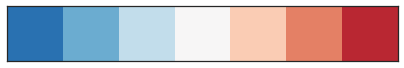

In [396]:
#sns.set_style("ticks")
current_palette = sns.color_palette("RdBu_r", 7) #sns.diverging_palette(220, 10, sep=80, n=7) #sns.color_palette("coolwarm_r", 7) #sns.color_palette("RdBu_r", 7) #sns.diverging_palette(145, 280, s=85, l=25, n=7) #sns.color_palette()
current_palette[0]
sns.palplot(current_palette)
plt.show()

In [184]:
years = range(1990,2018)
counts = [len(data[data['ORIGYEAR']==year]) for year in range(1990,2018)]
payments = [pd.to_numeric(data[data['ORIGYEAR']==year]['PAYMENT']).mean(skipna=True) for year in range(1990,2018)]

In [55]:
total_payments = [pd.to_numeric(data[data['ORIGYEAR']==year]['PAYMENT']).sum(skipna=True) for year in range(1990,2018)]

In [56]:
pickle.dump(years, open("years.pck", "wb"))
pickle.dump(counts, open("counts.pck", "wb"))
pickle.dump(payments, open("payments.pck", "wb"))

In [57]:
import bokeh
bokeh.__version__

u'0.12.16'

In [58]:
counts

[3140,
 21459,
 23605,
 23498,
 24313,
 22574,
 24260,
 30859,
 25076,
 27181,
 66545,
 40490,
 43377,
 45067,
 44672,
 43511,
 45680,
 47497,
 67608,
 50500,
 92020,
 84967,
 74812,
 71696,
 71540,
 78923,
 83237,
 73295]

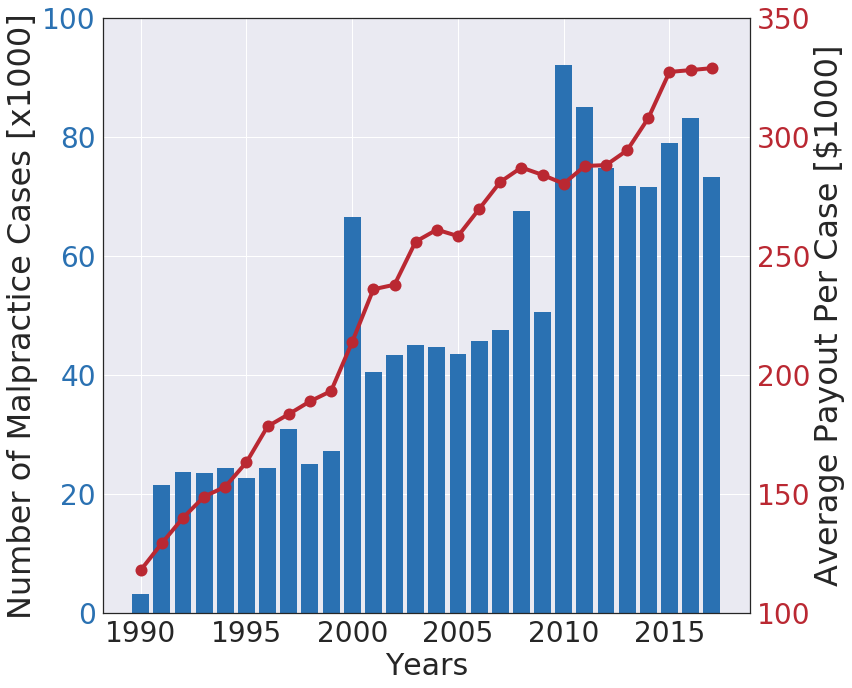

In [190]:
sns.set_style("darkgrid")

fig, ax1 = plt.subplots(figsize=(12,10))

ax1.bar(years,[count/1000. for count in counts],color=current_palette[0])
ax1.set_xlabel('Years',fontsize=30)
ax1.tick_params(axis='x',labelsize=28)
ax1.set_ylabel('Number of Malpractice Cases [x1000]',fontsize=32)
ax1.tick_params(axis='y',labelsize=28,labelcolor=current_palette[0])
ax1.set_ylim(0,100)



sns.set_style("white")
ax2 = ax1.twinx()
ax2.plot(years,[pay/1000. for pay in payments],color=current_palette[6],marker='o',markersize=12,linewidth=4)
ax2.set_ylabel('Average Payout Per Case [$1000]',fontsize=32)
ax2.tick_params(axis='y',labelsize=28,labelcolor=current_palette[6])
ax2.set_ylim(100,350)


fig.tight_layout()
#sns.despine()

plt.savefig('total_numbers_costs_across_us.jpg',dpi=100)
plt.show()

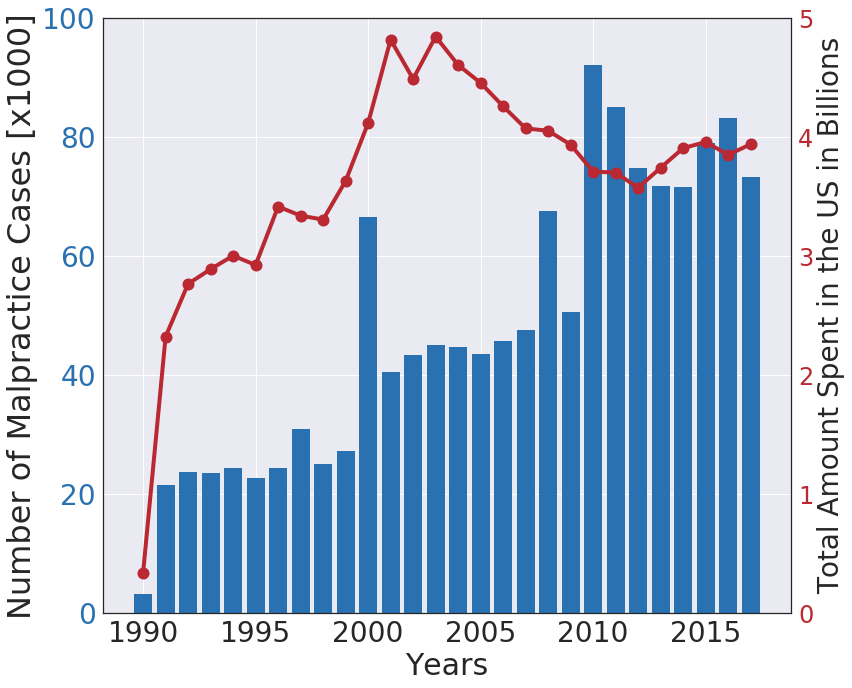

In [188]:
sns.set_style("darkgrid")

fig, ax1 = plt.subplots(figsize=(12,10))

ax1.bar(years,[count/1000. for count in counts],color=current_palette[0])
ax1.set_xlabel('Years',fontsize=30)
ax1.tick_params(axis='x',labelsize=28)
ax1.set_ylabel('Number of Malpractice Cases [x1000]',fontsize=32)
ax1.tick_params(axis='y',labelsize=28,labelcolor=current_palette[0])
ax1.set_ylim(0,100)



sns.set_style("white")
ax2 = ax1.twinx()
ax2.plot(years,[pay/1000000000. for pay in total_payments],
         color=current_palette[6],marker='o',markersize=12,linewidth=4)
ax2.set_ylabel('Total Amount Spent in the US in Billions',fontsize=28)
ax2.tick_params(axis='y',labelsize=24,labelcolor=current_palette[6])
ax2.set_ylim(0,5)


fig.tight_layout()
#sns.despine()

plt.savefig('total_payout_across_us.jpg',dpi=100)
plt.show()

sns.set_style("darkgrid")

fig, ax1 = plt.subplots(figsize=(14,8))

ax1.bar(range(1990,2018),[len(data[data['ORIGYEAR']==year]) for year in range(1990,2018)],color=current_palette[1])
ax1.set_xlabel('Years',fontsize=30)
ax1.tick_params(axis='x',labelsize=24)
ax1.set_ylabel('Total Number of Malpractice Cases',fontsize=28)
ax1.tick_params(axis='y',labelsize=24,labelcolor=current_palette[0])
ax1.set_ylim(0,100000)



sns.set_style("white")
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(range(1990,2018),
        [pd.to_numeric(data[data['ORIGYEAR']==year]['PAYMENT']).mean(skipna=True) for year in range(1990,2018)],
         color=current_palette[5],marker='o',markersize=12,linewidth=4)
ax2.set_ylabel('Mean Cost of Malpractice Cases ($)',fontsize=28)
ax2.tick_params(axis='y',labelsize=24,labelcolor=current_palette[6])
ax2.set_ylim(100000,350000)


fig.tight_layout()
#sns.despine()

plt.savefig('total_numbers_costs_across_us.jpg',dpi=100)
plt.show()

plt.bar(range(1990,2018),
        [pd.to_numeric(data[data['ORIGYEAR']==year]['FUNDPYMT']).mean(skipna=True) for year in range(1990,2018)],
        yerr=[pd.to_numeric(data[data['ORIGYEAR']==year]['FUNDPYMT']).sem(skipna=True) for year in range(1990,2018)])
plt.xlabel('Years')
plt.ylabel('State Payments for Malpractice Cases Across the US')
plt.tight_layout()
plt.savefig('fund_pymt_across_us.png',dpi=300)
plt.show()

data.hist(column='ORIGYEAR',bins=2018-1990,range=(1990,2018),alpha=0.5,by='WORKSTAT',figsize=(20,40),layout=(13,5))
plt.xlabel('Years')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.savefig('total_per_state.png',dpi=300)
plt.show()

data.hist(column='ORIGYEAR',bins=2018-1990,range=(1990,2018),alpha=0.5,by='WORKSTAT',figsize=(20,40),layout=(13,5))
plt.xlabel('Years')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.savefig('total_per_state.png',dpi=300)
plt.show()

### Find states common to census data and malpractice data:

In [61]:
common_states = np.intersect1d(list(data["WORKSTAT"].unique()),list(state_pop["State Abb"]))

In [62]:
print(common_states,len(common_states))

(array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='|S3'), 52)


In [63]:
print(state_pop[state_pop["State Abb"]=="CA"]["2016"][0])
print(state_pop[state_pop["State Abb"]=="NY"]["2016"][0])
print(state_pop[state_pop["State Abb"]=="PA"]["2016"][0])

39250017
19745289
12784227


### We start clustering analysis for the common_states in the data:

In [64]:
pay_count = None
for state in common_states:
    #print(state)
    arrays = [[state,state,state], ['pay_per_case', 'count_per_1000000','total_pay']]
    column_names = pd.MultiIndex.from_arrays(arrays).T
    mean_payment = [pd.to_numeric(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==i)]['PAYMENT']).mean() for i in range(1990,2018)]
    count_per_capita = [1000000.0*len(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==i)])/state_pop[state_pop["State Abb"]==state]["2016"][0] for i in range(1990,2018)]
    total_pay = [pd.to_numeric(data[(data["WORKSTAT"]==state) & (data["ORIGYEAR"]==i)]['PAYMENT']).sum() for i in range(1990,2018)]
    stack = pd.DataFrame(np.stack((mean_payment,
                                   count_per_capita,
                                   total_pay),axis=0).T,
                         columns=column_names,
                         index=range(1990,2018))
    #print(stack)
    if type(pay_count)==None:
        pay_count = stack
    else:
        pay_count = pd.concat([pay_count, stack], axis=1)

In [65]:
pay_count

AK                                           AL  \
       pay_per_case count_per_1000000   total_pay   pay_per_case   
1990            NaN          1.347901         0.0  166966.666667   
1991  196140.625000         41.784945   3138250.0  121558.333333   
1992  105808.333333         59.307664   3174250.0  217455.555556   
1993  130986.764706         67.395073   4453550.0  230903.448276   
1994   85071.428571         59.307664   2382000.0  254741.666667   
1995  178137.500000         43.132846   3562750.0  281157.894737   
1996  151242.857143         52.568157   5293500.0  405196.236559   
1997  158375.000000         36.393339   3167500.0  225808.988764   
1998  286718.750000         52.568157   6881250.0  296460.674157   
1999  270546.296296         94.353102   7304750.0  274947.887324   
2000  159310.344828        172.531386   4620000.0  367873.529412   
2001  240925.000000         48.524452   7227750.0  244472.727273   
2002  210240.384615         40.437044   5466250.0  233686.781609   
2003  241908.333333         57.959762   7257250.0  212584.027778   
2004  189822.000000         47.176551   4745550.0  211181.818182   
2005  737932.692308         48.524452  19186250.0  223898.305085   
2006  187931.818182         44.480748   4134500.0  281934.375000   
2007  482916.666667         33.697536   5795000.0  182864.912281   
2008  193289.473684         44.480748   3672500.0  310454.545455   
2009  229140.625000         40.437044   3666250.0  306960.000000   
2010  615511.904762         51.220255  12925750.0  282437.500000   
2011  419333.333333         53.916058   6290000.0  250020.833333   
2012  361029.411765         49.872354   6137500.0  317812.500000   
2013  289482.142857         62.003467   4052750.0  454377.659574   
2014  270666.666667         78.178284   4060000.0  637780.172414   
2015  334264.705882         60.655565   5682500.0  308533.653846   
2016  208750.000000         47.176551   2922500.0  426599.000000   
2017  251363.636364         62.003467   5530000.0  402366.071429   

                                               AR                    \
     count_per_1000000   total_pay   pay_per_case count_per_1000000   
1990          4.112434   2504500.0   81357.142857          6.023596   
1991         23.646495   9481550.0   83832.258065         39.488021   
1992         23.440873  15656800.0  226307.065217         39.822665   
1993         26.525199  20088600.0  126375.000000         37.145511   
1994         24.468982  19869850.0  116544.871795         32.795136   
1995         25.497090  21368000.0  107418.354430         35.806934   
1996         25.291469  37683250.0  105860.000000         36.476223   
1997         28.581416  20097000.0   96891.791045         35.472290   
1998         31.871363  26385000.0  178015.789474         49.861993   
1999         30.637633  19521300.0  187451.219512         41.495887   
2000        330.434067  37523100.0  225487.654321         80.314619   
2001        116.998746  24202800.0  169092.233010         67.263494   
2002        137.355294  20330750.0  226741.818182         65.590272   
2003        137.766537  15306050.0  326037.974684         71.948513   
2004        154.421895  16261000.0  261940.229885         38.484088   
2005        163.058006  13210000.0  295718.085106         37.480156   
2006        179.096498  18043800.0  213264.492754         33.464425   
2007        179.918985  10423300.0  259293.103448         31.456559   
2008         67.443917  17075000.0  319433.035714         29.448694   
2009         42.152448  15348000.0  330504.098361         36.476223   
2010        204.593589  14686750.0  291380.434783         32.125848   
2011        190.611313  12001000.0  304291.666667         53.208435   
2012         82.043057  13983750.0  252745.833333         40.157310   
2013         45.236773  21355750.0  309718.181818         33.464425   
2014         41.124339  36991250.0  383099.137931         35.806934   
2015         53.256020  16043750.0  318035.000000         3

In [66]:
state_slope = []
for state in common_states:
    slope1, intercept1, rvalue1, pvalue1, stderr1 = scipy.stats.linregress(range(1991,2018),
                                                                      pay_count[state,"pay_per_case"][1:])
    slope2, intercept2, rvalue2, pvalue2, stderr2 = scipy.stats.linregress(range(1991,2018),
                                                                      pay_count[state,"count_per_1000000"][1:])
    slope3, intercept3, rvalue3, pvalue3, stderr3 = scipy.stats.linregress(range(1991,2018),
                                                                      pay_count[state,"total_pay"][1:])

    state_slope.append([state,slope1,slope2,slope3])
    
df_state_slope=pd.DataFrame(state_slope,columns=["state","slope_pay_per_case","slope_count_per_1000000","slope_total_pay"])
df_state_slope #.sort_values("slope")

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay
0,AK,8321.941851,-0.203255,6.754667e+04
1,AL,7108.157358,2.025211,-6.274377e+04
2,AR,10004.046375,-0.317074,2.903926e+05
3,AZ,8321.170539,0.962205,9.005864e+05
4,CA,4825.125569,-0.782451,2.424531e+05
5,CO,9293.988498,-0.664984,5.577813e+05
6,CT,14683.618435,-0.742375,1.097702e+06
7,DC,3311.312423,-3.223822,-6.302341e+05
8,DE,10083.690040,-0.160951,-1.967924e+04
9,FL,2107.915479,-0.289428,-4.791743e+05


In [67]:
from bokeh.io import show, save, output_notebook 
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    ContinuousColorMapper,
    LabelSet,
    Label,
    LogColorMapper, 
    LogTicker, 
    FixedTicker,
    BasicTicker,
    #LinearTicker,
    ContinuousTicker,
    ColorBar, 
    LinearColorMapper,
    Legend
)
from bokeh.plotting import figure, output_file, show
## This is where we get the state data from:
from bokeh.sampledata.us_states import data as states
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.palettes import Viridis256 as palette

try:
    del states["HI"]
    del states["AK"]
except:
    pass

#palette.reverse()

states = {
    code: state for code, state in states.items()
}
#print(states)

state_xs = [states[code]["lons"] for code in states]
state_ys = [states[code]["lats"] for code in states]
state_names = [state['name'] for state in states.values()]

slope_pay_per_case = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    slope_pay_per_case.append(float(df_state_slope[df_state_slope["state"]==abbr]["slope_pay_per_case"]))
    
slope_count_per_1000000 = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    slope_count_per_1000000.append(float(df_state_slope[df_state_slope["state"]==abbr]["slope_count_per_1000000"]))
    
slope_total_pay = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    slope_total_pay.append(float(df_state_slope[df_state_slope["state"]==abbr]["slope_total_pay"]))
    
state_abbr = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    state_abbr.append(abbr)
    
#print(state_rates)

lat_inkm = 111.132 ## at around lat = 45degrees from the wiki latitude page
lon_inkm = 78.847 ## at around lat = 45degrees from the wiki latitude page

In [247]:
#from bokeh.palettes import Viridis256 as palette
from bokeh.palettes import RdYlBu11 as palette

from bokeh.palettes import Category20
from bokeh.layouts import column
from bokeh.models import *
from bokeh.plotting import Figure, output_file, show
from bokeh.io import output_notebook, reset_output

#output_notebook()

color_mapper = LinearColorMapper(palette=palette) #, low=min(slope_count_per_1000000), high=max(slope_count_per_1000000))

source = ColumnDataSource(data=dict(
    x=state_xs,
    y=state_ys,
    name=state_names,
    clusters=state_clusters,
    cluster_label=cluster_label,
    slopes1=slope_pay_per_case,
    slopes2=slope_count_per_1000000,
    slopes3=slope_total_pay,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(#title="Change in the number of malpractice cases filed per a million citizens per states, 1990-2018", 
    plot_width=int((max(max(state_xs))-min(min(state_xs)))*lon_inkm/4.5), 
    plot_height=int((max(max(state_ys))-min(min(state_ys)))*lat_inkm/4.5), tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)

p.grid.grid_line_color = None

mypatches = p.patches('x', 'y', source=source,
          fill_color={'field': 'slopes2', 'transform': color_mapper},
          fill_alpha=0.7, line_color="gray", line_width=0.5)

color_bar = ColorBar(color_mapper=color_mapper, ticker=BasicTicker(),
                     label_standoff=12, border_line_color=None, location=(0,0),major_label_text_font_size="14pt")

p.add_layout(color_bar, 'right')
#HoverTool(tooltips=None, callback=callback, renderers=[cr])
hover = p.select_one(HoverTool) #(tooltips=None, callback=callback, renderers=[mypatches]))
hover.point_policy = "follow_mouse"
hover.tooltips ="""
    <font size="3">State: <strong>@name</strong> </font> <br>
    <font size="3"><strong>Changes in:</strong> </font> <br>
    <font size="3">state payout: <strong>$@slopes3</strong> </font> <br>
    <font size="3">prevalence: <strong>@slopes2 cases per million</strong> </font> <br>
    <font size="3">mean cost: <strong>$@slopes1 </strong> </font>
"""
#output_notebook()
callback = CustomJS(args=dict(source=source, patches=mypatches), code="""
    var selected_slopes = cb_obj.value;
    patches.glyph.fill_color.field = selected_slopes;
    source.change.emit();
""")

#slider = Slider(start=0.1, end=4, value=1, step=.1, title="power")
# slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)
#slider.js_on_change('value', callback)

menu = [("mean state payout ($)", "slopes1"), 
        ("number of cases per million", "slopes2"), 
        ("total state payout ($)", "slopes3")]
dropdown = Dropdown(menu=menu, label="Select option to see change in...")

dropdown.js_on_change('value', callback)

layout = column(dropdown, p)

show(layout)
#show(layout, notebook_handle=True)

#output_file("malpractice_by_state.html",title="Malpractice by state")
#save(p, filename="malpractice_by_state.html", title="Malpractice by state", resource='cdn')


## CLUSTERS FOR STATE ANALYSIS:

In [263]:
df_state_slope["slope_pay_per_case"].std(), df_state_slope["slope_count_per_1000000"].std(), df_state_slope["slope_total_pay"].std()

(4413.1494669911053, 2.0195565701274747, 1647026.1406377198)

In [265]:
normalized_slopes = df_state_slope[["slope_pay_per_case","slope_count_per_1000000","slope_total_pay"]].values/[df_state_slope["slope_pay_per_case"].std(), df_state_slope["slope_count_per_1000000"].std(), df_state_slope["slope_total_pay"].std()]

In [281]:
correlation_slope1 = np.zeros((len(common_states),len(common_states)))
correlation_slope2 = np.zeros((len(common_states),len(common_states)))
correlation_slope3 = np.zeros((len(common_states),len(common_states)))

for state1 in range(len(common_states)):
    for state2 in range(len(common_states)):
        #print(float(df_state_slope[df_state_slope["state"]==common_states[state1]]["slope"]))
        #print(float(df_state_slope[df_state_slope["state"]==common_states[state2]]["slope"]))
        #correlation_slope[state1,state2] = np.sqrt(((
        #    float(df_state_slope[df_state_slope["state"]==common_states[state1]]["slope"])-
        #    float(df_state_slope[df_state_slope["state"]==common_states[state2]]["slope"])))**2)
        correlation_slope1[state1,state2] = ((
            float(df_state_slope[df_state_slope["state"]==common_states[state1]]["slope_pay_per_case"])-
            float(df_state_slope[df_state_slope["state"]==common_states[state2]]["slope_pay_per_case"])))**2
        correlation_slope2[state1,state2] = ((
            float(df_state_slope[df_state_slope["state"]==common_states[state1]]["slope_count_per_1000000"])-
            float(df_state_slope[df_state_slope["state"]==common_states[state2]]["slope_count_per_1000000"])))**2
        correlation_slope3[state1,state2] = ((
            float(df_state_slope[df_state_slope["state"]==common_states[state1]]["slope_total_pay"])-
            float(df_state_slope[df_state_slope["state"]==common_states[state2]]["slope_total_pay"])))**2

In [282]:
print(correlation_slope1)
print(correlation_slope2)
print(correlation_slope3)

[[        0.           1473272.7949232    2829475.63116048 ...,
    8965517.84113583  25939846.30422615   7065750.61638855]
 [  1473272.7949232          0.           8386173.20011193 ...,
    3170048.37133564  15049224.91252585  14991860.97593   ]
 [  2829475.63116048   8386173.20011193         0.         ...,
   21868267.86590405  45903634.0597593     952660.80245923]
 ..., 
 [  8965517.84113583   3170048.37133564  21868267.86590405 ...,         0.
    4405255.6316625   31949574.04728461]
 [ 25939846.30422615  15049224.91252585  45903634.0597593  ...,
    4405255.6316625          0.          60082117.00818208]
 [  7065750.61638855  14991860.97593       952660.80245923 ...,
   31949574.04728461  60082117.00818208         0.        ]]
[[  0.           4.96605851   0.01295486 ...,   0.23402818   1.39093764
    0.46208437]
 [  4.96605851   0.           5.48629868 ...,   7.35619208  11.61341231
    2.39846434]
 [  0.01295486   5.48629868   0.         ...,   0.13685943   1.13541976
    0.62

In [321]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN

def clusters(correlations, epsval=0.05):
    db = DBSCAN(eps=epsval, min_samples=1,metric='precomputed').fit_predict(correlations)
    #core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    #core_samples_mask[db.core_sample_indices_] = True
    for i in np.unique(db):
        print(i,common_states[np.where(db==i)])
    print len(np.unique(db))
    return db


db1 = clusters(correlation_slope1,epsval=380000.0)
db2 = clusters(correlation_slope2,epsval=0.05)
db3 = clusters(correlation_slope3,epsval=20000000000.0)

(0, array(['AK', 'AL', 'AZ', 'IA', 'IN', 'KY', 'MO', 'MT', 'NE', 'OH', 'TN',
       'UT'],
      dtype='|S3'))
(1, array(['AR', 'CO', 'DE', 'GA', 'ID', 'MD', 'NJ', 'NM', 'NY', 'PA', 'VA',
       'VT', 'WA', 'WY'],
      dtype='|S3'))
(2, array(['CA', 'LA', 'MI', 'NC', 'ND', 'SC', 'SD', 'WI'],
      dtype='|S3'))
(3, array(['CT'],
      dtype='|S3'))
(4, array(['DC', 'FL', 'MS', 'NV', 'OK', 'WV'],
      dtype='|S3'))
(5, array(['HI', 'ME', 'OR', 'RI'],
      dtype='|S3'))
(6, array(['IL'],
      dtype='|S3'))
(7, array(['KS', 'PR', 'TX'],
      dtype='|S3'))
(8, array(['MA'],
      dtype='|S3'))
(9, array(['MN'],
      dtype='|S3'))
(10, array(['NH'],
      dtype='|S3'))
11
(0, array(['AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA',
       'IN', 'KS', 'KY', 'MA', 'MD', 'MN', 'MO', 'MS', 'ND', 'NE', 'NH',
       'NJ', 'NM', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'WI', 'WY'],
      dtype='|S3'))
(1, array(['AL', 'NV', 'PR'],
      dtype='|S3'))
(2, array(['DC'],
      

In [324]:
df_state_cluster = pd.DataFrame(np.column_stack((db1,db2,db3)),columns=["cluster_slope_pay_per_case",
                                                             "cluster_slope_count_per_1000000",
                                                             "cluster_slope_total_pay"])
df_state_slope_cluster = pd.concat([df_state_slope,df_state_cluster],axis=1)
df_state_slope_cluster

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay,cluster_slope_pay_per_case,cluster_slope_count_per_1000000,cluster_slope_total_pay
0,AK,8321.941851,-0.203255,6.754667e+04,0,0,0
1,AL,7108.157358,2.025211,-6.274377e+04,0,1,0
2,AR,10004.046375,-0.317074,2.903926e+05,1,0,1
3,AZ,8321.170539,0.962205,9.005864e+05,0,0,1
4,CA,4825.125569,-0.782451,2.424531e+05,2,0,1
5,CO,9293.988498,-0.664984,5.577813e+05,1,0,1
6,CT,14683.618435,-0.742375,1.097702e+06,3,0,1
7,DC,3311.312423,-3.223822,-6.302341e+05,4,2,0
8,DE,10083.690040,-0.160951,-1.967924e+04,1,0,0
9,FL,2107.915479,-0.289428,-4.791743e+05,4,0,0


In [ ]:
step1 = pd.merge(df_state_slope_cluster,
         pd.DataFrame(df_state_slope_cluster.groupby(["cluster_slope_pay_per_case"])["slope_pay_per_case"].mean()), 
         how='left',on="cluster_slope_pay_per_case")

step2 = pd.merge(step1,
         pd.DataFrame(df_state_slope_cluster.groupby(["cluster_slope_count_per_1000000"])["slope_count_per_1000000"].mean()), 
         how='left',on="cluster_slope_count_per_1000000")

df_state_slope_clusters = pd.merge(step2,
                                     pd.DataFrame(df_state_slope_cluster.groupby(["cluster_slope_total_pay"])["slope_total_pay"].mean()), 
                                     how='left',on="cluster_slope_total_pay")

In [340]:
df_state_slope_clusters
df_state_slope_clusters.rename(index=str, columns={"slope_pay_per_case_x": "slope_pay_per_case", 
                                                   "slope_count_per_1000000_x": "slope_count_per_1000000",
                                                   "slope_total_pay_x": "slope_total_pay",
                                                   "slope_pay_per_case_y": "avg_slope_pay_per_case", 
                                                   "slope_count_per_1000000_y": "avg_slope_count_per_1000000",
                                                   "slope_total_pay_y": "avg_slope_total_pay"}, inplace=True)
df_state_slope_clusters

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay,cluster_slope_pay_per_case,cluster_slope_count_per_1000000,cluster_slope_total_pay,avg_slope_pay_per_case,avg_slope_count_per_1000000,avg_slope_total_pay
0,AK,8321.941851,-0.203255,6.754667e+04,0,0,0,7639.704163,-0.128846,-1.827306e+05
1,AL,7108.157358,2.025211,-6.274377e+04,0,1,0,7639.704163,1.949438,-1.827306e+05
2,AR,10004.046375,-0.317074,2.903926e+05,1,0,1,10521.874767,-0.128846,5.177296e+05
3,AZ,8321.170539,0.962205,9.005864e+05,0,0,1,7639.704163,-0.128846,5.177296e+05
4,CA,4825.125569,-0.782451,2.424531e+05,2,0,1,4971.149983,-0.128846,5.177296e+05
5,CO,9293.988498,-0.664984,5.577813e+05,1,0,1,10521.874767,-0.128846,5.177296e+05
6,CT,14683.618435,-0.742375,1.097702e+06,3,0,1,14683.618435,-0.128846,5.177296e+05
7,DC,3311.312423,-3.223822,-6.302341e+05,4,2,0,2961.592965,-3.223822,-1.827306e+05
8,DE,10083.690040,-0.160951,-1.967924e+04,1,0,0,10521.874767,-0.128846,-1.827306e+05
9,FL,2107.915479,-0.289428,-4.791743e+05,4,0,0,2961.592965,-0.128846,-1.827306e+05


#average_slopes = []
#for state in common_states:
#    current_cluster = int(df_state_slope_cluster[df_state_slope_cluster["state"]==state]["cluster"])
#    #print(current_cluster)
#    average_slope = df_state_slope_cluster[df_state_slope_cluster["cluster"]==current_cluster]["slope_count_per_1000000"].mean()
#    average_slopes.append(average_slope)
    
#df_cluster_slope = pd.DataFrame(np.array(average_slopes).T,columns=["avg_slopes"])
#df_state_slope_cluster_aslope = pd.concat([df_state_slope_cluster,df_cluster_slope],axis=1)

cluster_colors = pd.DataFrame(np.array(average_slopes).T,columns=["cl_colors"])
df_state_slope_cluster_aslope_acolor = pd.concat([df_state_slope_cluster_aslope,cluster_colors],axis=1)

start = 0
for i in np.unique(df_state_slope_cluster_aslope["avg_slopes"].sort_values()):
    #print(i)
    #print(start)
    df_state_slope_cluster_aslope_acolor.replace(to_replace= {'cl_colors': {i: start}}, inplace=True)
    start += 1
    

#df_state_slope_cluster_aslope_acolor

for i in range(len(np.unique(db))):
    print("CLUSTER "+str(i))
    data[data["WORKSTAT"].isin(list(common_states[np.where(db==i)]))].hist(column='ORIGYEAR',bins=2018-1990,range=(1990,2018),alpha=0.5,by='WORKSTAT',figsize=(20,60),layout=(20,3))
    plt.show()

state_clusters=[]
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    state_clusters.append(palette[int(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor["state"]==abbr]["cl_colors"])])

#state_clusters

cluster_label = []
for name in state_names:
    abbr = state_pop.loc[name]["State Abb"]
    cluster_label.append(int(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor["state"]==abbr]["cl_colors"])+1)

#cluster_label

In [287]:
df_state_slope_cluster_aslope_acolor

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay,cluster,avg_slopes,cl_colors
0,AK,8321.941851,-0.203255,6.754667e+04,0,-0.128846,4.0
1,AL,7108.157358,2.025211,-6.274377e+04,1,1.949438,6.0
2,AR,10004.046375,-0.317074,2.903926e+05,0,-0.128846,4.0
3,AZ,8321.170539,0.962205,9.005864e+05,0,-0.128846,4.0
4,CA,4825.125569,-0.782451,2.424531e+05,0,-0.128846,4.0
5,CO,9293.988498,-0.664984,5.577813e+05,0,-0.128846,4.0
6,CT,14683.618435,-0.742375,1.097702e+06,0,-0.128846,4.0
7,DC,3311.312423,-3.223822,-6.302341e+05,2,-3.223822,1.0
8,DE,10083.690040,-0.160951,-1.967924e+04,0,-0.128846,4.0
9,FL,2107.915479,-0.289428,-4.791743e+05,0,-0.128846,4.0


In [288]:
df_state_slope_cluster_aslope_acolor_ori = pickle.load(open("df_state_slope_cluster_aslope_acolor.pck", "rb"))
df_state_slope_cluster_aslope_acolor_ori

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay,cluster,avg_slopes,cl_colors
0,AK,8321.941851,-0.203255,6.754667e+04,0,-0.128846,4.0
1,AL,7108.157358,2.025211,-6.274377e+04,1,1.949438,6.0
2,AR,10004.046375,-0.317074,2.903926e+05,0,-0.128846,4.0
3,AZ,8321.170539,0.962205,9.005864e+05,0,-0.128846,4.0
4,CA,4825.125569,-0.782451,2.424531e+05,0,-0.128846,4.0
5,CO,9293.988498,-0.664984,5.577813e+05,0,-0.128846,4.0
6,CT,14683.618435,-0.742375,1.097702e+06,0,-0.128846,4.0
7,DC,3311.312423,-3.223822,-6.302341e+05,2,-3.223822,1.0
8,DE,10083.690040,-0.160951,-1.967924e+04,0,-0.128846,4.0
9,FL,2107.915479,-0.289428,-4.791743e+05,0,-0.128846,4.0


In [68]:
import pickle
print(pickle.compatible_formats)

['1.0', '1.1', '1.2', '1.3', '2.0']


In [248]:
state_clusters

['#40004b',
 '#d9f0d3',
 '#1b7837',
 '#d9f0d3',
 '#a6dba0',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#f7f7f7',
 '#762a83',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#5aae61',
 '#5aae61',
 '#d9f0d3',
 '#e7d4e8',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#e7d4e8',
 '#d9f0d3',
 '#9970ab',
 '#a6dba0',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#f7f7f7',
 '#d9f0d3',
 '#f7f7f7',
 '#d9f0d3',
 '#c2a5cf',
 '#5aae61',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#00441b',
 '#d9f0d3',
 '#5aae61',
 '#d9f0d3',
 '#d9f0d3',
 '#d9f0d3',
 '#c2a5cf',
 '#d9f0d3']

In [70]:
pickle.dump(state_xs, open("state_xs.pck", "wb"))
pickle.dump(state_ys, open("state_ys.pck", "wb"))
pickle.dump(state_names, open("state_names.pck", "wb"))
#pickle.dump(state_rates, open("state_rates.pck", "wb"))
#pickle.dump(state_clusters, open("state_clusters.pck", "wb"))
#pickle.dump(cluster_label, open("cluster_label.pck", "wb"))
pickle.dump(slope_pay_per_case, open("slope_per_case.pck", "wb"))
pickle.dump(slope_count_per_1000000, open("slope_count_per_1000000.pck", "wb"))
pickle.dump(slope_total_pay, open("slope_total_pay.pck", "wb"))

In [71]:
state_xs = pickle.load(open("state_xs.pck", "rb"))
state_ys = pickle.load(open("state_ys.pck", "rb"))
state_names = pickle.load(open("state_names.pck", "rb"))
state_rates = pickle.load(open("state_rates.pck", "rb"))
state_clusters = pickle.load(open("state_clusters.pck", "rb"))
cluster_label = pickle.load(open("cluster_label.pck", "rb"))
slope_pay_per_case = pickle.load(open("slope_per_case.pck", "rb"))
slope_count_per_1000000 = pickle.load(open("slope_count_per_1000000.pck", "rb"))
slope_total_pay = pickle.load(open("slope_total_pay.pck", "rb"))

pickle.dump(df_state_slope_cluster_aslope_acolor, open("df_state_slope_cluster_aslope_acolor.pck", "wb"))
pickle.dump(pay_count, open("pay_count.pck", "wb"))

In [73]:
df_state_slope_cluster_aslope_acolor = pickle.load(open("df_state_slope_cluster_aslope_acolor.pck", "rb"))
pay_count = pickle.load(open("pay_count.pck", "rb"))

In [527]:
pickle.dump(df_state_slope_clusters, open("df_state_slope_clusters.pck", "wb"),protocol=2)
df_state_slope_clusters

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay,cluster_slope_pay_per_case,cluster_slope_count_per_1000000,cluster_slope_total_pay,avg_slope_pay_per_case,avg_slope_count_per_1000000,avg_slope_total_pay
0,AK,8321.941851,-0.203255,6.754667e+04,0,0,0,7639.704163,-0.128846,-1.827306e+05
1,AL,7108.157358,2.025211,-6.274377e+04,0,1,0,7639.704163,1.949438,-1.827306e+05
2,AR,10004.046375,-0.317074,2.903926e+05,1,0,1,10521.874767,-0.128846,5.177296e+05
3,AZ,8321.170539,0.962205,9.005864e+05,0,0,1,7639.704163,-0.128846,5.177296e+05
4,CA,4825.125569,-0.782451,2.424531e+05,2,0,1,4971.149983,-0.128846,5.177296e+05
5,CO,9293.988498,-0.664984,5.577813e+05,1,0,1,10521.874767,-0.128846,5.177296e+05
6,CT,14683.618435,-0.742375,1.097702e+06,3,0,1,14683.618435,-0.128846,5.177296e+05
7,DC,3311.312423,-3.223822,-6.302341e+05,4,2,0,2961.592965,-3.223822,-1.827306e+05
8,DE,10083.690040,-0.160951,-1.967924e+04,1,0,0,10521.874767,-0.128846,-1.827306e+05
9,FL,2107.915479,-0.289428,-4.791743e+05,4,0,0,2961.592965,-0.128846,-1.827306e+05


In [361]:
#df_state_slope_clusters
#"pay_per_case","count_per_1000000","slope_total_pay"
def create_plot(state,metric):
    mn = ["pay_per_case","count_per_1000000","total_pay"][metric]
    if metric==0:
        y_ax_label = 'Average Payout of Malpractice Cases'
    elif metric==1:
        y_ax_label = 'Malpractice Cases Filed Per Million'
    elif metric==2:
        y_ax_label = 'Total of Malpractice Payout of State'
    #print(state,mn)
    p = figure(plot_width=500, plot_height=500, x_axis_label='Years', y_axis_label=y_ax_label)
    p.xaxis.axis_label_text_font_size = "15pt"
    p.yaxis.axis_label_text_font_size = "15pt"
    rank = int(df_state_slope_clusters[df_state_slope_clusters['state']==state]['cluster_slope_'+mn])
    cur_states = list(df_state_slope_clusters[df_state_slope_clusters["cluster_slope_"+mn]==rank]["state"])
    states_title = str()
    #print(cur_states)
    for x in cur_states:
        states_title = states_title+x+', '
    if len(cur_states)>4:
        sel_states = list(np.random.choice(cur_states,size=4,replace=False))
        sel_states.sort()
        if state in sel_states:
            sel_states.pop(sel_states.index(state))
            cur_states = [state]+sel_states
            #print('if',cur_states)
        else:
            cur_states = [state]+sel_states[:3]
            #print('else',cur_states)
        states_title = str()
        for x in cur_states:
            states_title = states_title+x+', '
        p.title.text = states_title[:-2]+" among others."
    else:
        p.title.text = states_title[:-2]+"."
    
    for state_, color in zip(cur_states, Category20[20]):
        curve = pay_count[state_,mn]
        #plt.plot(range(1990,2018),curve,label=state,marker='.')
        r = p.line(curve.index, curve,line_width=2, color=color, alpha=1.,
                   muted_color=color, muted_alpha=0.2, legend=state_)
        if state_!=state:
            r.muted=True
    p.legend.location = "top_right"
    p.legend.click_policy="mute"
    return(p)

#output_notebook()
from bokeh.layouts import column, row

plot_mini1 = create_plot("GA",0)
plot_mini2 = create_plot("GA",1)
plot_mini3 = create_plot(u"GA",2)
layoutx = row([plot_mini1,plot_mini2,plot_mini3])

show(layoutx)
#show(plot_mini)

In [283]:
def create_plot(state):
    print(state)
    p = figure(plot_width=700, plot_height=500, x_axis_label='Years', y_axis_label='Malpractice cases filed per 1,000,000')
    p.xaxis.axis_label_text_font_size = "15pt"
    p.yaxis.axis_label_text_font_size = "15pt"
    rank = int(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor['state']==state]['cl_colors'])
    cur_states = list(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor["cl_colors"]==rank]["state"])
    states_title = str()
    #print(cur_states)
    for x in cur_states:
        states_title = states_title+x+', '
    if len(cur_states)>8:
        sel_states = list(np.random.choice(cur_states,size=8,replace=False))
        sel_states.sort()
        if state in sel_states:
            sel_states.pop(sel_states.index(state))
            cur_states = [state]+sel_states
            print('if',cur_states)
        else:
            cur_states = [state]+sel_states[:7]
            print('else',cur_states)
        states_title = str()
        for x in cur_states:
            states_title = states_title+x+', '
        p.title.text = states_title[:-2]+" among others (Ranking "+str(rank)+")."
    else:
        p.title.text = states_title[:-2]+" (Ranking "+str(rank)+")."
    
    for state_, color in zip(cur_states, Category20[20]):
        curve = pay_count[state_,"count_per_1000000"]
        #plt.plot(range(1990,2018),curve,label=state,marker='.')
        r = p.line(curve.index, curve,line_width=2, color=color, alpha=1.,
                   muted_color=color, muted_alpha=0.2, legend=state_)
        if state_!=state:
            r.muted=True
    p.legend.location = "top_right"
    p.legend.click_policy="mute"
    return(p)

#output_notebook()
plot_mini = create_plot("CT")
show(plot_mini)

CT
('else', ['CT', 'AZ', 'CA', 'MA', 'MO', 'NJ', 'SC', 'UT'])


In [76]:
alist = ['UT', 'SD', 'RI', 'IN', 'FL', 'CA', 'NJ', 'TN']
alist.sort()
alist[:7]

['CA', 'FL', 'IN', 'NJ', 'RI', 'SD', 'TN']

In [77]:
from bokeh.layouts import column, row
from bokeh.models import CustomJS, ColumnDataSource, Select
from bokeh.plotting import Figure, output_file, show
from bokeh.layouts import column, gridplot

output_file("js_on_change.html")

def create_plot(ranking):
    p = figure(plot_width=450, plot_height=450, x_axis_label='Years', y_axis_label='Malpractice cases filed per 1,000,000')
    cur_states = list(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor["cl_colors"]==ranking]["state"])
    states_title = str()
    for x in cur_states:
        states_title = states_title+x+', '
    
    if len(cur_states)>8:
        cur_states = np.random.choice(cur_states,size=8,replace=False)
        states_title = str()
        for x in cur_states:
            states_title = states_title+x+', '
        p.title.text = states_title[:-2]+" among others (Ranking "+str(ranking)+")."
    else:
        p.title.text = states_title[:-2]+" (Ranking "+str(ranking)+")."
    
    for state, color in zip(cur_states, Category20[20]):
        curve = pay_count[state,"count_per_1000000"]
        #plt.plot(range(1990,2018),curve,label=state,marker='.')
        p.line(curve.index, curve,line_width=2, color=color, alpha=1.,
               muted_color=color, muted_alpha=0.2, legend=state)
    p.legend.location = "top_right"
    p.legend.click_policy="mute"
    return(p)



plot0 = create_plot(ranking=0)
plot1 = create_plot(ranking=1)

plot2 = create_plot(ranking=2)
plot3 = create_plot(ranking=3)


plot4 = create_plot(ranking=4)
plot5 = create_plot(ranking=5)


plot6 = create_plot(ranking=6)
plot7 = create_plot(ranking=7)


plot8 = create_plot(ranking=8)
plot9 = create_plot(ranking=9)


plot10 = create_plot(ranking=10)

#plot = gridplot([plot0,plot1],[plot2,plot3],[plot4,plot5],[plot6,plot7],[plot8,plot9],[plot10,None])
plot = gridplot([plot0,plot1,plot2],[plot3,plot4,plot5],[plot6,plot7,plot8],[plot9,plot10,None])
show(plot)

In [78]:
non_existent = ["AL", "AK", "AZ", "AR", "DE", "GA", "HI", "ID", "IA", "KY", "LA", "MS", 
                "MO", "MT", "NH", "NM", "NC", "ND", "OK", "SD", "VA", "WV", "WI"] 
mandatory = ["CA", "CO", "CT", "DC", "FL", "IL", "IN", "KS", "ME", "MD", "MA", "MN", 
             "NV", "NJ", "NY", "OH", "PA", "RI", "SC", "TN", "TX", "UT", "VT", "WA"]
partial = ["OR", "WY"]
#no_info = ["PR"]
self_organized = ["MI"]
voluntary = ["NE"]

In [79]:
#df_state_slope_cluster_aslope_acolor["state"]

In [80]:
ordered_mandatory = []
for state in list(df_state_slope_cluster_aslope_acolor["state"]):
    #print(state)
    if state in non_existent:
        ordered_mandatory.append('No')
    elif state in mandatory:
        ordered_mandatory.append('Yes')
    elif state in partial:
        ordered_mandatory.append('Partially')
    elif state in voluntary:
        ordered_mandatory.append('Voluntary')
    elif state in self_organized:
        ordered_mandatory.append('Self Org.')
    #elif state in no_info:
    #    ordered_mandatory.append('NA')
    else:
        print(state,"ERROR")

('PR', 'ERROR')


In [81]:
#ordered_mandatory
slope_per_case = pickle.load(open("slope_per_case.pck", "rb"))
slope_count_per_1000000 = pickle.load(open("slope_count_per_1000000.pck", "rb"))
slope_total_pay = pickle.load(open("slope_total_pay.pck", "rb"))

plt.scatter(ordered_mandatory,list(df_state_slope_cluster_aslope_acolor["slope"].drop([39])), marker='o')
plt.show()

In [82]:
slope_mandatory = pd.DataFrame(np.stack([np.array(df_state_slope_cluster_aslope_acolor["state"].drop([39])),
                                         np.array(df_state_slope_cluster_aslope_acolor["slope_pay_per_case"].drop([39])), 
                                         np.array(df_state_slope_cluster_aslope_acolor["slope_count_per_1000000"].drop([39])), 
                                         np.array(df_state_slope_cluster_aslope_acolor["slope_total_pay"].drop([39])), 
                                         np.array(df_state_slope_cluster_aslope_acolor["cl_colors"].drop([39])),
                                         np.array(ordered_mandatory)]).T, columns=['state','slope_pay_per_case',
                                                                                   'slope_count_per_1000000',
                                                                                   'slope_total_pay',
                                                                                   "ranking","mandatory"])

In [83]:
#slope_mandatory

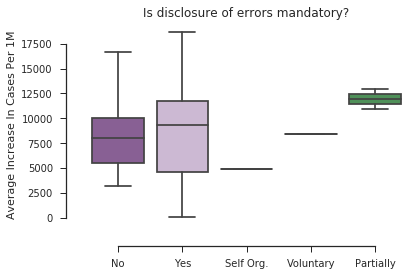

In [84]:
import seaborn as sns
sns.set(style="ticks")

sns.boxplot(x=np.array(ordered_mandatory), 
            y=np.array(df_state_slope_cluster_aslope_acolor["slope_pay_per_case"].drop([39])), 
            palette="PRGn", width=0.8)

sns.despine(offset=20, trim=True)
plt.title("Is disclosure of errors mandatory?")
plt.ylabel("Average Increase In Cases Per 1M") #,fontsize=14)
plt.tight_layout()
plt.savefig("Mandatory.png",dpi=300)
plt.show()

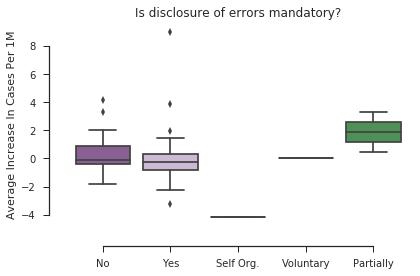

In [85]:
sns.set(style="ticks")

sns.boxplot(x=np.array(ordered_mandatory), 
            y=np.array(df_state_slope_cluster_aslope_acolor["slope_count_per_1000000"].drop([39])), 
            palette="PRGn", width=0.8)

sns.despine(offset=20, trim=True)
plt.title("Is disclosure of errors mandatory?")
plt.ylabel("Average Increase In Cases Per 1M") #,fontsize=14)
plt.tight_layout()
plt.savefig("Mandatory.png",dpi=300)
plt.show()

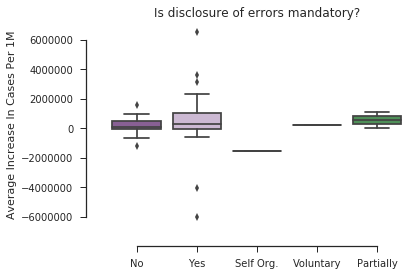

In [86]:
sns.set(style="ticks")

sns.boxplot(x=np.array(ordered_mandatory), 
            y=np.array(df_state_slope_cluster_aslope_acolor["slope_total_pay"].drop([39])), 
            palette="PRGn", width=0.8)

sns.despine(offset=20, trim=True)
plt.title("Is disclosure of errors mandatory?")
plt.ylabel("Average Increase In Cases Per 1M") #,fontsize=14)
plt.tight_layout()
plt.savefig("Mandatory.png",dpi=300)
plt.show()

## Most problematic license fields:

In [87]:
#data

In [88]:
licnfeld = pd.read_csv('license_fields.csv',delimiter=',')[["Value","Label"]]
licnfeld_dict = licnfeld.to_dict(orient='split')
#np.array(licnfeld_dict['data'])

In [89]:
licnfeld_dict

{'columns': ['Value', 'Label'],
 'data': [[10, 'Allopathic Physician (MD)'],
  [15, 'Physician Resident (MD)'],
  [20, 'Osteopathic Physician (DO)'],
  [25, 'Osteopathic Physician Resident (DO)'],
  [30, 'Dentist'],
  [35, 'Dental Resident'],
  [50, 'Pharmacist'],
  [55, 'Pharmacy Intern '],
  [60, 'Pharmacist, Nuclear'],
  [70, 'Pharmacy Assistant'],
  [75, 'Pharmacy Technician '],
  [76, 'Other Pharmacy Service Occupation'],
  [100, 'Registered Nurse'],
  [110, 'Nurse Anesthetist'],
  [120, 'Nurse Midwife'],
  [130, 'Nurse Practitioner'],
  [134, 'Doctor of Nursing Practice '],
  [135, 'Advanced Nurse Practitioner '],
  [140, 'LPN or Vocational Nurse'],
  [141, 'Clinical Nurse Specialist '],
  [142, 'Other Nurse Occupation'],
  [148, 'Certified Nurse Aide/Nursing Assistant '],
  [150, 'Nurse Aide/Nursing Assistant'],
  [160, 'Home Health Aide (Homemaker)'],
  [165, 'Health Care Aide/Direct Care Worker '],
  [170, 'Psychiatric Technician'],
  [175, 'Certified or Qualified Medication A

In [90]:
dict_fin = {}
for element in licnfeld_dict['data']:
    dict_fin[element[0]] = element[1]

#print(dict_fin)

In [91]:
clustering_data = data.copy()
clustering_data.replace(to_replace= {'LICNFELD': dict_fin}, inplace=True)

In [92]:
clustering_data

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,WORKCTRY,HOMESTAT,HOMECTRY,LICNSTAT,LICNFELD,...,ACCRRPTS,NPMALRPT,NPLICRPT,NPCLPRPT,NPPSMRPT,NPDEARPT,NPEXCRPT,NPGARPT,NPCTMRPT,FUNDPYMT
0,1,A,301,1991,OK,NaN,NaN,NaN,OK,Allopathic Physician (MD),...,0,0,2,0,0,0,0,0,0,NaN
1,2,A,301,1991,OK,NaN,NaN,NaN,OK,Allopathic Physician (MD),...,0,0,7,0,0,0,1,0,0,NaN
2,4,A,301,1991,MA,NaN,NaN,NaN,MA,Physician Resident (MD),...,0,1,1,0,0,0,2,0,0,NaN
3,6,A,301,1990,OK,NaN,NaN,NaN,OK,Allopathic Physician (MD),...,0,0,2,0,0,0,0,0,0,NaN
4,8,A,301,1990,OK,NaN,NaN,NaN,OK,Allopathic Physician (MD),...,0,0,6,0,1,0,0,0,0,NaN
5,9,A,301,1990,OK,NaN,OK,NaN,OK,Allopathic Physician (MD),...,0,1,3,0,0,0,0,0,0,NaN
6,12,A,301,1990,VA,NaN,IL,NaN,VA,Allopathic Physician (MD),...,0,0,10,0,0,0,0,0,0,NaN
7,13,A,301,1990,KY,NaN,KY,NaN,DC,Allopathic Physician (MD),...,0,0,1,0,0,0,0,0,0,NaN
8,14,A,301,1990,OH,NaN,NaN,NaN,OH,Dentist,...,0,0,1,0,0,0,0,0,0,NaN
9,15,A,301,1990,OH,NaN,NaN,NaN,OH,Dentist,...,0,0,3,0,0,0,0,0,0,NaN


clustering_data.hist(column='LICNFELD',alpha=0.5,by='WORKSTAT',figsize=(20,40),layout=(13,5))
plt.xlabel('License')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.savefig('Licenses.png',dpi=300)
plt.show()

plt.figure(figsize=(20,10))
clustering_data['LICNFELD'].hist(bins=xrot=90)
plt.xlabel('License')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.savefig('Licenses.png',dpi=300)
plt.show()

In [93]:
#np.unique(clustering_data['LICNFELD'])

In [94]:
pickle.dump(clustering_data[["LICNFELD","WORKSTAT"]], open("clustering_data.pck", "wb"))

In [95]:
license_state = pickle.load(open("clustering_data.pck", "rb"))

In [96]:
license_state

,LICNFELD,WORKSTAT
0,Allopathic Physician (MD),OK
1,Allopathic Physician (MD),OK
2,Physician Resident (MD),MA
3,Allopathic Physician (MD),OK
4,Allopathic Physician (MD),OK
5,Allopathic Physician (MD),OK
6,Allopathic Physician (MD),VA
7,Allopathic Physician (MD),KY
8,Dentist,OH
9,Dentist,OH


In [97]:
def license_bar_plot(df,upto=20,save=None):
    lic_list = []
    count = []
    for license in np.unique(df['LICNFELD']):
        lic_list.append(license)
        count.append(len(df[df['LICNFELD']==license]))
    lic_count = pd.DataFrame(np.array(count).T,columns=['count'],index=lic_list)
    lic_count.sort_values('count',inplace=True,ascending=False)
    lic_count[:upto].plot(kind='barh',figsize=(20,15),fontsize=24)
    plt.tight_layout()
    if save!=None:
        plt.savefig(save, dpi=300)
    plt.show()
    return lic_count

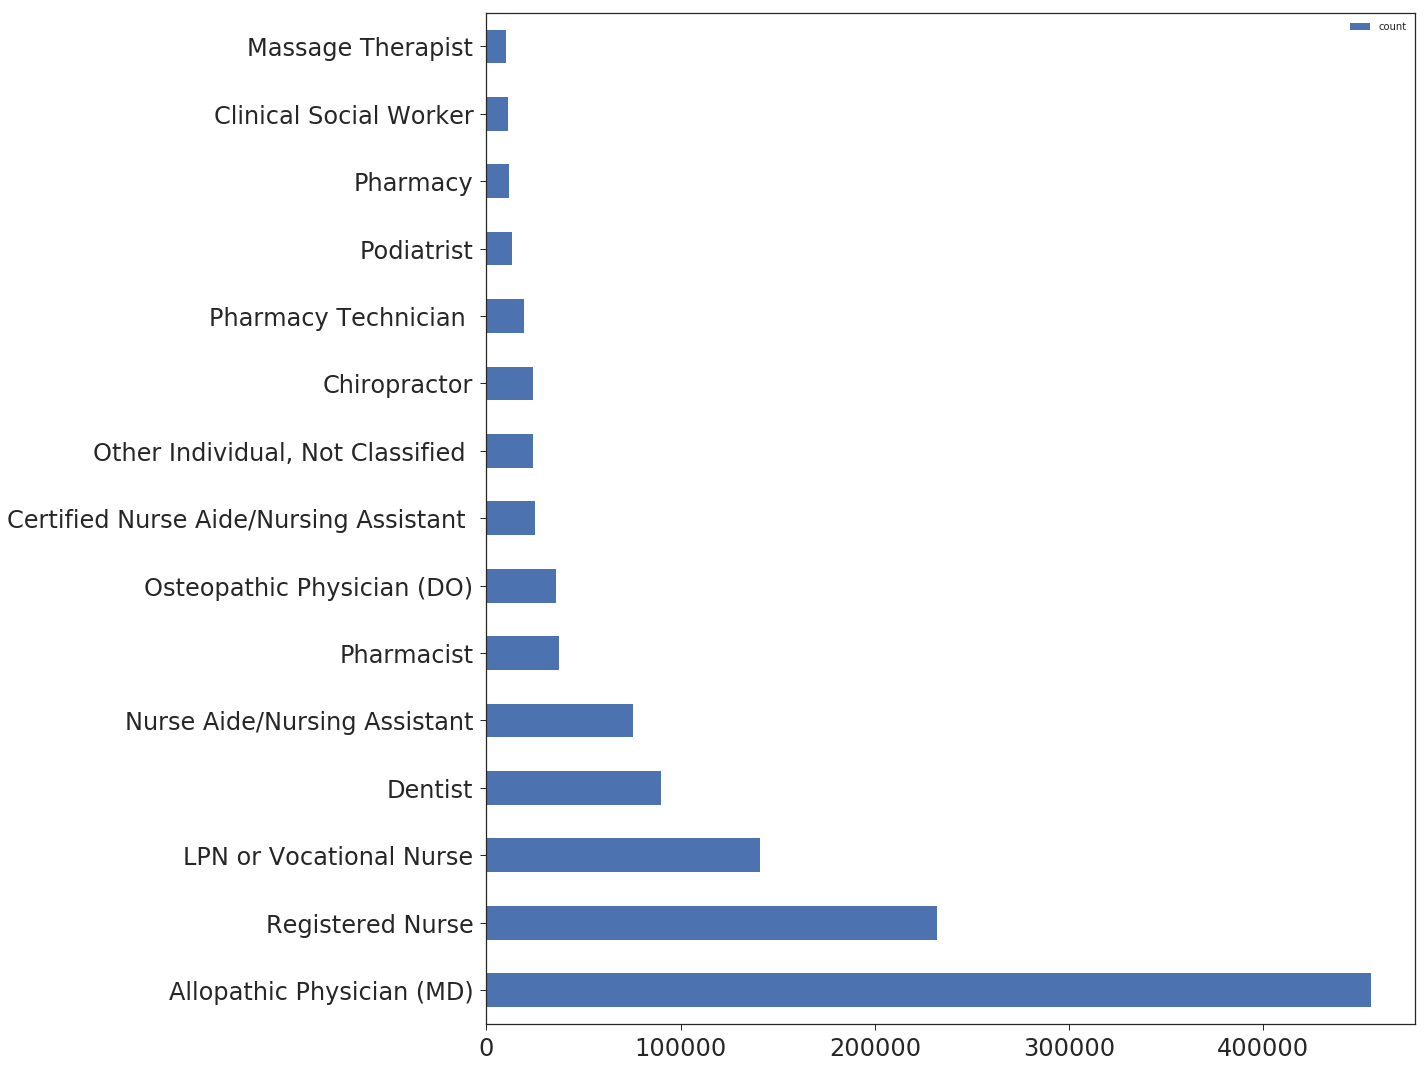

,count
Allopathic Physician (MD),455433
Registered Nurse,231925
LPN or Vocational Nurse,140851
Dentist,89638
Nurse Aide/Nursing Assistant,75341
Pharmacist,37316
Osteopathic Physician (DO),35880
Certified Nurse Aide/Nursing Assistant,25024
"Other Individual, Not Classified",23878
Chiropractor,23819


In [98]:
license_bar_plot(clustering_data,upto=15,save="risky_fields.png")

In [99]:
def license_bar_plot_state(state,upto=10,save=None):
    current = license_state[license_state["WORKSTAT"]==state]
    lic_list = []
    count = []
    for license in np.unique(current['LICNFELD']):
        lic_list.append(license)
        count.append(len(current[current['LICNFELD']==license]))
    lic_count = pd.DataFrame(np.array(count).T,columns=['count'],index=lic_list)
    lic_count.sort_values('count',inplace=True,ascending=False)
    lic_count[:upto].plot(kind='barh',figsize=(20,15),fontsize=24)
    plt.tight_layout()
    if save!=None:
        plt.savefig(save, dpi=300)
    plt.show()
    return lic_count

In [100]:
bokeh.__version__

u'0.12.16'

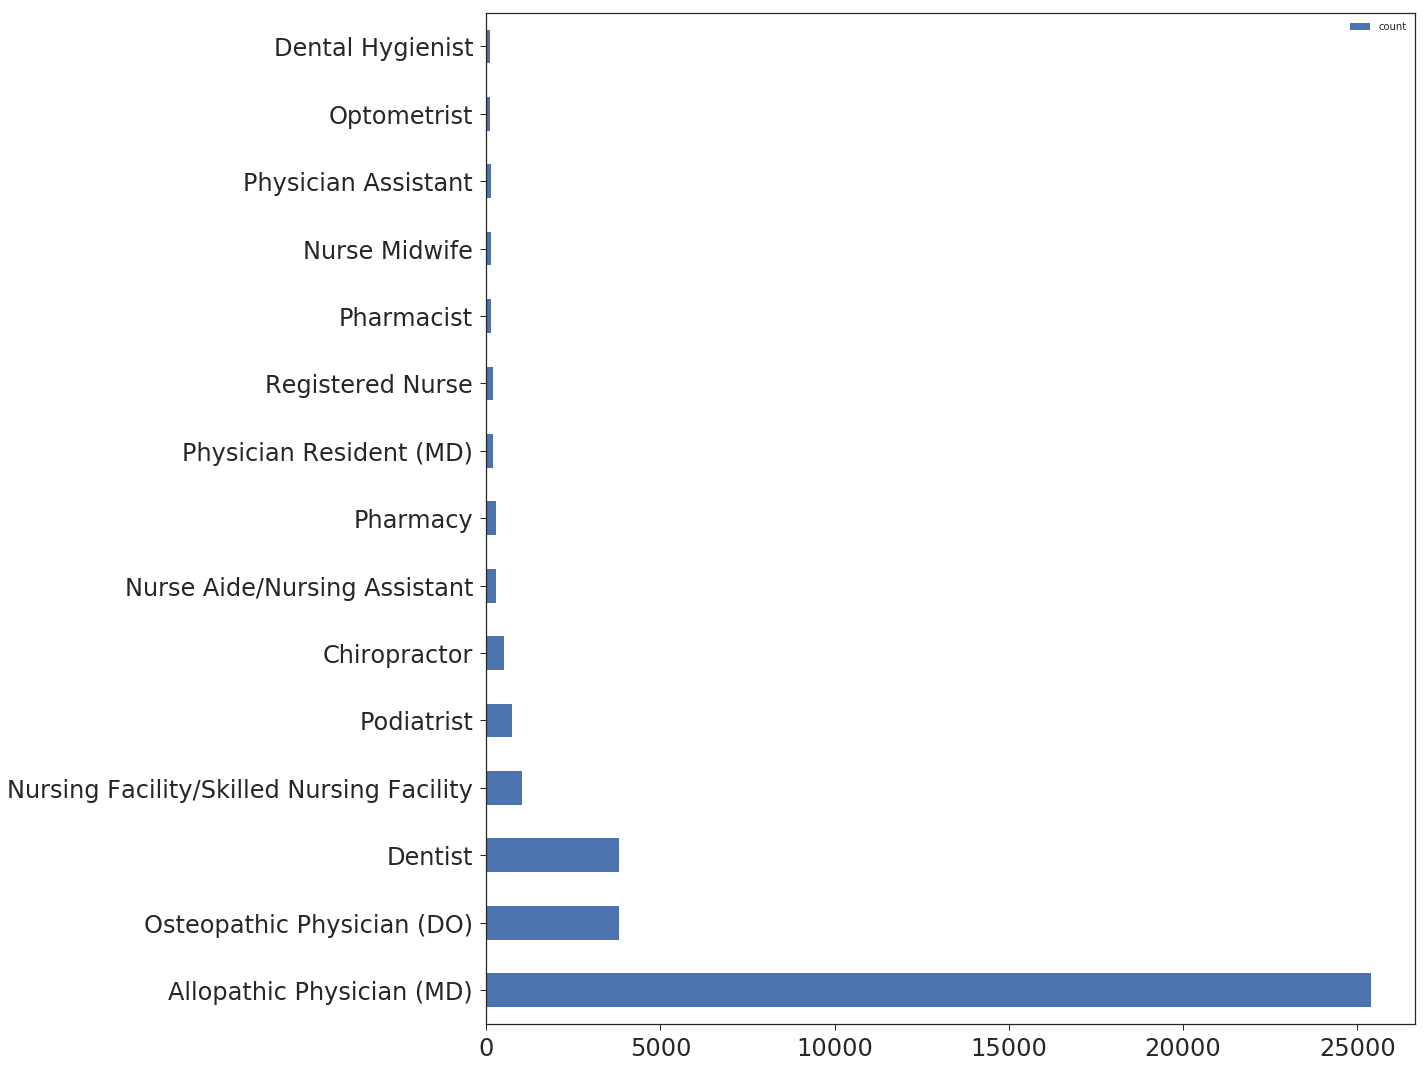

,count
Allopathic Physician (MD),25393
Osteopathic Physician (DO),3806
Dentist,3800
Nursing Facility/Skilled Nursing Facility,1043
Podiatrist,728
Chiropractor,503
Nurse Aide/Nursing Assistant,295
Pharmacy,283
Physician Resident (MD),211
Registered Nurse,190


In [101]:
license_bar_plot_state("PA",upto=15,save="risky_fields_PA.png")

In [102]:
#lic_count_MI = license_bar_plot(clustering_data[clustering_data['WORKSTAT']=="MI"][["LICNFELD","WORKSTAT"]],upto=30)

In [103]:
#lic_count_MI.index

In [104]:
#list(lic_count_MI.index)[:10]

from bokeh.io import output_file, show
from bokeh.sampledata.autompg import autompg as df

p = figure(plot_width=450, plot_height=450)

p.vbar(x=list(lic_count_MI.index)[:10], width=0.5, bottom=0, top=list(lic_count_MI["count"])[:10], color="#CAB2D6")

output_file("bar.html")

show(p)

In [105]:
data.columns

Index([u'SEQNO', u'RECTYPE', u'REPTYPE', u'ORIGYEAR', u'WORKSTAT', u'WORKCTRY',
       u'HOMESTAT', u'HOMECTRY', u'LICNSTAT', u'LICNFELD', u'PRACTAGE',
       u'GRAD', u'ALGNNATR', u'ALEGATN1', u'ALEGATN2', u'OUTCOME', u'MALYEAR1',
       u'MALYEAR2', u'PAYMENT', u'TOTALPMT', u'PAYNUMBR', u'NUMBPRSN',
       u'PAYTYPE', u'PYRRLTNS', u'PTAGE', u'PTGENDER', u'PTTYPE', u'AAYEAR',
       u'AACLASS1', u'AACLASS2', u'AACLASS3', u'AACLASS4', u'AACLASS5',
       u'BASISCD1', u'BASISCD2', u'BASISCD3', u'BASISCD4', u'BASISCD5',
       u'AALENTYP', u'AALENGTH', u'AAEFYEAR', u'AASIGYR', u'TYPE', u'PRACTNUM',
       u'ACCRRPTS', u'NPMALRPT', u'NPLICRPT', u'NPCLPRPT', u'NPPSMRPT',
       u'NPDEARPT', u'NPEXCRPT', u'NPGARPT', u'NPCTMRPT', u'FUNDPYMT'],
      dtype='object')

In [106]:
data[data['HOMECTRY'].notna()]

,SEQNO,RECTYPE,REPTYPE,ORIGYEAR,WORKSTAT,WORKCTRY,HOMESTAT,HOMECTRY,LICNSTAT,LICNFELD,...,ACCRRPTS,NPMALRPT,NPLICRPT,NPCLPRPT,NPPSMRPT,NPDEARPT,NPEXCRPT,NPGARPT,NPCTMRPT,FUNDPYMT


In [107]:
np.nan==np.nan

False

fig, ax1 = plt.subplots(figsize=(14,8))

ax1.bar(range(1990,2018),[len(data[data['ORIGYEAR']==year]) for year in range(1990,2018)],color=current_palette[0])
ax1.set_xlabel('Years',fontsize=30)
ax1.tick_params(axis='x',labelsize=24)
ax1.set_ylabel('Total Number of Malpractice Cases',fontsize=28)
ax1.tick_params(axis='y',labelsize=24,labelcolor=current_palette[0])
ax1.set_ylim(0,100000)

In [108]:
data.columns

Index([u'SEQNO', u'RECTYPE', u'REPTYPE', u'ORIGYEAR', u'WORKSTAT', u'WORKCTRY',
       u'HOMESTAT', u'HOMECTRY', u'LICNSTAT', u'LICNFELD', u'PRACTAGE',
       u'GRAD', u'ALGNNATR', u'ALEGATN1', u'ALEGATN2', u'OUTCOME', u'MALYEAR1',
       u'MALYEAR2', u'PAYMENT', u'TOTALPMT', u'PAYNUMBR', u'NUMBPRSN',
       u'PAYTYPE', u'PYRRLTNS', u'PTAGE', u'PTGENDER', u'PTTYPE', u'AAYEAR',
       u'AACLASS1', u'AACLASS2', u'AACLASS3', u'AACLASS4', u'AACLASS5',
       u'BASISCD1', u'BASISCD2', u'BASISCD3', u'BASISCD4', u'BASISCD5',
       u'AALENTYP', u'AALENGTH', u'AAEFYEAR', u'AASIGYR', u'TYPE', u'PRACTNUM',
       u'ACCRRPTS', u'NPMALRPT', u'NPLICRPT', u'NPCLPRPT', u'NPPSMRPT',
       u'NPDEARPT', u'NPEXCRPT', u'NPGARPT', u'NPCTMRPT', u'FUNDPYMT'],
      dtype='object')

In [109]:
data[["LICNFELD","PRACTAGE","GRAD","PTAGE","PTGENDER","PTTYPE"]]

,LICNFELD,PRACTAGE,GRAD,PTAGE,PTGENDER,PTTYPE
0,10,60.0,1950.0,NaN,NaN,NaN
1,10,40.0,1960.0,NaN,NaN,NaN
2,15,30.0,1980.0,NaN,NaN,NaN
3,10,40.0,1970.0,NaN,NaN,NaN
4,10,40.0,1970.0,NaN,NaN,NaN
5,10,40.0,1970.0,NaN,NaN,NaN
6,10,30.0,1980.0,NaN,NaN,NaN
7,10,70.0,1950.0,NaN,NaN,NaN
8,30,60.0,1950.0,NaN,NaN,NaN
9,30,40.0,1970.0,NaN,NaN,NaN


In [110]:
docs = pd.read_csv('states_MD_vs_DO.csv',header=1)

In [111]:
docs

,Unnamed: 0,Total Population,Number,Rate Per 100000,Rank,Number.1,Rate Per 100000.1,Number.2,Rate Per 100000.2
0,United States,313914040,817850,260.5,NaN,759227,241.9,58409,18.6
1,Alabama,4822023,9681,200.8,44.0,9259,192.0,419,8.7
2,Alaska,731449,1813,247.9,25.0,1642,224.5,171,23.4
3,Arizona,6553255,15133,230.9,32.0,13391,204.3,1738,26.5
4,Arkansas,2949131,5629,190.9,48.0,5377,182.3,252,8.5
5,California,38041430,97977,257.6,20.0,93884,246.8,4063,10.7
6,Colorado,5187582,13869,267.3,16.0,12767,246.1,1098,21.2
7,Connecticut,3590347,11949,332.8,6.0,11527,321.1,420,11.7
8,Delaware,917092,2439,265.9,18.0,2149,234.3,289,31.5
9,District of Columbia,632323,5559,879.1,NaN,5435,859.5,122,19.3


In [112]:
docs_new_index = {}
for new, old in zip(['state','population','totaldocs','docper100000','rank','mds','mdsper100000','dos','dosper100000'],docs.columns):
    docs_new_index[old] = new
    
docs_new_index

{'Number': 'totaldocs',
 'Number.1': 'mds',
 'Number.2': 'dos',
 'Rank': 'rank',
 'Rate Per 100000': 'docper100000',
 'Rate Per 100000.1': 'mdsper100000',
 'Rate Per 100000.2': 'dosper100000',
 'Total Population': 'population',
 'Unnamed: 0': 'state'}

In [113]:
docs.rename(columns=docs_new_index,inplace=True)

In [114]:
state_pop

,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,State Abb
United States,308745538,308758105,309348193,311663358,313998379,316204908,318563456,320896618,323127513,US
Northeast,55317240,55318353,55388056,55632766,55829059,55988771,56116791,56184737,56209510,NE
Midwest,66927001,66929825,66978602,67153331,67332320,67543948,67726368,67838387,67941429,MW
South,114555744,114563005,114863114,116061801,117299171,118424320,119696311,121039206,122319574,SO
West,71945553,71946922,72118421,72815460,73537829,74247869,75023986,75834288,76657000,WE
Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,AL
Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894,AK
Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071,AZ
Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248,AR
California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,CA


In [115]:
state_pop.loc['Puerto Rico']

Census            3725789
Estimates Base    3726157
2010              3721525
2011              3678732
2012              3634488
2013              3593077
2014              3534874
2015              3473181
2016              3411307
State Abb              PR
Name: Puerto Rico, dtype: object

In [116]:
state_abb =  []
for state in docs['state']:
    if state in state_pop.index:
        state_abb.append(state_pop.loc[state]['State Abb'])
    else:
        state_abb.append(state)

state_abb

['US',
 'AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [117]:
docs['state_abb'] = state_abb

In [118]:
docs['ratio'] = docs['mds']/docs['dos']

In [119]:
[df_state_slope_cluster_aslope_acolor['slope_pay_per_case']]

[0      8321.941851
 1      7108.157358
 2     10004.046375
 3      8321.170539
 4      4825.125569
 5      9293.988498
 6     14683.618435
 7      3311.312423
 8     10083.690040
 9      2107.915479
 10     9872.362817
 11    13708.284978
 12     8206.920235
 13    10902.790820
 14    17659.892387
 15     7942.173216
 16      866.455484
 17     8048.700417
 18     4810.288206
 19    18683.776636
 20    11091.220968
 21    12834.000315
 22     4921.046926
 23    15551.531493
 24     7639.078058
 25     3305.632999
 26     6451.943829
 27     4557.997564
 28     5574.653597
 29     8454.539832
 30    16676.319725
 31    11168.124499
 32    10332.686804
 33     2662.007479
 34    11337.386236
 35     7014.188130
 36     3153.865101
 37    12983.404973
 38    11249.449867
 39      484.054340
 40    13543.573345
 41     3942.741913
 42     5809.651694
 43     6455.368023
 44      104.517162
 45     7712.268468
 46    11848.151016
 47     9292.230598
 48     9850.028385
 49     5327.694392


In [120]:
df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor['state']=='IN']['slope_pay_per_case']

15    7942.173216
Name: slope_pay_per_case, dtype: float64

In [121]:
docs[docs['state_abb']=='IN']['ratio']

15    14.483207
Name: ratio, dtype: float64

In [122]:
df_state_slope_cluster_aslope_acolor

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay,cluster,avg_slopes,cl_colors
0,AK,8321.941851,-0.203255,6.754667e+04,0,-0.128846,4.0
1,AL,7108.157358,2.025211,-6.274377e+04,1,1.949438,6.0
2,AR,10004.046375,-0.317074,2.903926e+05,0,-0.128846,4.0
3,AZ,8321.170539,0.962205,9.005864e+05,0,-0.128846,4.0
4,CA,4825.125569,-0.782451,2.424531e+05,0,-0.128846,4.0
5,CO,9293.988498,-0.664984,5.577813e+05,0,-0.128846,4.0
6,CT,14683.618435,-0.742375,1.097702e+06,0,-0.128846,4.0
7,DC,3311.312423,-3.223822,-6.302341e+05,2,-3.223822,1.0
8,DE,10083.690040,-0.160951,-1.967924e+04,0,-0.128846,4.0
9,FL,2107.915479,-0.289428,-4.791743e+05,0,-0.128846,4.0


[-0.2032549808916782, 2.0252105256114876, -0.3170744019562457, 0.9622046389524315, -0.7824514626639071, -0.6649835321924439, -0.7423746089887839, -3.223821800682203, -0.16095083133573143, -0.2894277560172265, -0.2733239005726195, -0.442312159660505, -0.8022004115401459, 1.2510050296568351, -1.446617123060401, -0.7749697070738226, -0.8510880667037141, 0.7666732781642175, 1.3857865955815702, -0.17279556148917585, 0.315273349341463, 1.4420238096315598, -4.13612733949549, -0.10573254688420909, -0.40078819005456146, -0.8722236855561892, -1.8399579079470108, 4.170708190541856, 0.19169966607271335, 0.027152905731637318, 0.1824922505626283, 0.19711910937650545, 0.19831592405552706, 1.9489951321228118, -2.040949884255698, -2.261628696391899, 3.2873316862019974, 3.3161346376434326, -2.258678438317614, 1.8741093642883488, -0.21324231444012662, 0.6909652697226021, 0.659559110961496, -0.5245691208241691, 0.19288356599065185, 0.2865207142713462, -0.1185176239100435, 3.8579395729800625, 9.00002546544

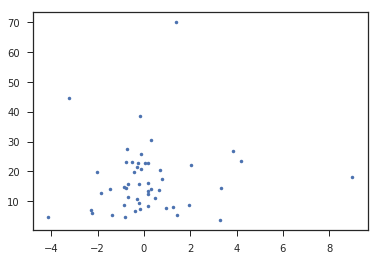

In [123]:
slopes = []
ratios = []
colors = []

for state in common_states:
    #print state
    slopes.append(float(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor['state']==state]['slope_count_per_1000000']))
    ratios.append(float(docs[docs['state_abb']==state]['ratio']))
    colors.append(int(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor['state']==state]['cl_colors']))

print slopes
print ratios
plt.plot(slopes,ratios,marker='.',linewidth=0)
plt.show()

In [124]:
pay_count

AK                                           AL  \
       pay_per_case count_per_1000000   total_pay   pay_per_case   
1990            NaN          1.347901         0.0  166966.666667   
1991  196140.625000         41.784945   3138250.0  121558.333333   
1992  105808.333333         59.307664   3174250.0  217455.555556   
1993  130986.764706         67.395073   4453550.0  230903.448276   
1994   85071.428571         59.307664   2382000.0  254741.666667   
1995  178137.500000         43.132846   3562750.0  281157.894737   
1996  151242.857143         52.568157   5293500.0  405196.236559   
1997  158375.000000         36.393339   3167500.0  225808.988764   
1998  286718.750000         52.568157   6881250.0  296460.674157   
1999  270546.296296         94.353102   7304750.0  274947.887324   
2000  159310.344828        172.531386   4620000.0  367873.529412   
2001  240925.000000         48.524452   7227750.0  244472.727273   
2002  210240.384615         40.437044   5466250.0  233686.781609   
2003  241908.333333         57.959762   7257250.0  212584.027778   
2004  189822.000000         47.176551   4745550.0  211181.818182   
2005  737932.692308         48.524452  19186250.0  223898.305085   
2006  187931.818182         44.480748   4134500.0  281934.375000   
2007  482916.666667         33.697536   5795000.0  182864.912281   
2008  193289.473684         44.480748   3672500.0  310454.545455   
2009  229140.625000         40.437044   3666250.0  306960.000000   
2010  615511.904762         51.220255  12925750.0  282437.500000   
2011  419333.333333         53.916058   6290000.0  250020.833333   
2012  361029.411765         49.872354   6137500.0  317812.500000   
2013  289482.142857         62.003467   4052750.0  454377.659574   
2014  270666.666667         78.178284   4060000.0  637780.172414   
2015  334264.705882         60.655565   5682500.0  308533.653846   
2016  208750.000000         47.176551   2922500.0  426599.000000   
2017  251363.636364         62.003467   5530000.0  402366.071429   

                                               AR                    \
     count_per_1000000   total_pay   pay_per_case count_per_1000000   
1990          4.112434   2504500.0   81357.142857          6.023596   
1991         23.646495   9481550.0   83832.258065         39.488021   
1992         23.440873  15656800.0  226307.065217         39.822665   
1993         26.525199  20088600.0  126375.000000         37.145511   
1994         24.468982  19869850.0  116544.871795         32.795136   
1995         25.497090  21368000.0  107418.354430         35.806934   
1996         25.291469  37683250.0  105860.000000         36.476223   
1997         28.581416  20097000.0   96891.791045         35.472290   
1998         31.871363  26385000.0  178015.789474         49.861993   
1999         30.637633  19521300.0  187451.219512         41.495887   
2000        330.434067  37523100.0  225487.654321         80.314619   
2001        116.998746  24202800.0  169092.233010         67.263494   
2002        137.355294  20330750.0  226741.818182         65.590272   
2003        137.766537  15306050.0  326037.974684         71.948513   
2004        154.421895  16261000.0  261940.229885         38.484088   
2005        163.058006  13210000.0  295718.085106         37.480156   
2006        179.096498  18043800.0  213264.492754         33.464425   
2007        179.918985  10423300.0  259293.103448         31.456559   
2008         67.443917  17075000.0  319433.035714         29.448694   
2009         42.152448  15348000.0  330504.098361         36.476223   
2010        204.593589  14686750.0  291380.434783         32.125848   
2011        190.611313  12001000.0  304291.666667         53.208435   
2012         82.043057  13983750.0  252745.833333         40.157310   
2013         45.236773  21355750.0  309718.181818         33.464425   
2014         41.124339  36991250.0  383099.137931         35.806934   
2015         53.256020  16043750.0  318035.000000         3

In [125]:
pay_count['AK']['count_per_1000000'].loc[2013]

62.003466802535137

In [126]:
palette

['#440154',
 '#440255',
 '#440357',
 '#450558',
 '#45065A',
 '#45085B',
 '#46095C',
 '#460B5E',
 '#460C5F',
 '#460E61',
 '#470F62',
 '#471163',
 '#471265',
 '#471466',
 '#471567',
 '#471669',
 '#47186A',
 '#48196B',
 '#481A6C',
 '#481C6E',
 '#481D6F',
 '#481E70',
 '#482071',
 '#482172',
 '#482273',
 '#482374',
 '#472575',
 '#472676',
 '#472777',
 '#472878',
 '#472A79',
 '#472B7A',
 '#472C7B',
 '#462D7C',
 '#462F7C',
 '#46307D',
 '#46317E',
 '#45327F',
 '#45347F',
 '#453580',
 '#453681',
 '#443781',
 '#443982',
 '#433A83',
 '#433B83',
 '#433C84',
 '#423D84',
 '#423E85',
 '#424085',
 '#414186',
 '#414286',
 '#404387',
 '#404487',
 '#3F4587',
 '#3F4788',
 '#3E4888',
 '#3E4989',
 '#3D4A89',
 '#3D4B89',
 '#3D4C89',
 '#3C4D8A',
 '#3C4E8A',
 '#3B508A',
 '#3B518A',
 '#3A528B',
 '#3A538B',
 '#39548B',
 '#39558B',
 '#38568B',
 '#38578C',
 '#37588C',
 '#37598C',
 '#365A8C',
 '#365B8C',
 '#355C8C',
 '#355D8C',
 '#345E8D',
 '#345F8D',
 '#33608D',
 '#33618D',
 '#32628D',
 '#32638D',
 '#31648D',
 '#3

In [127]:
plot_colors = [palette[x] for x in colors]

In [128]:
plot_colors

['#45065A',
 '#46095C',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#440255',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45085B',
 '#450558',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45085B',
 '#45065A',
 '#45065A',
 '#45085B',
 '#440154',
 '#45065A',
 '#45065A',
 '#45065A',
 '#440357',
 '#460E61',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#46095C',
 '#440357',
 '#440357',
 '#460B5E',
 '#460B5E',
 '#440357',
 '#46095C',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#45065A',
 '#460C5F',
 '#470F62',
 '#45065A',
 '#450558',
 '#45065A']

[1.3479014522290247, 4.112433944029774, 6.023596435101772, 6.203947413033282, 7.694264183376022, 9.565845959197155, 8.947414924064407, 14.680623045642058, 7.3524391716952096, 7.810817535954867, 4.364537415772914, 2.1000212102142233, 8.294273155297823, 3.564765854296137, 10.233144624251818, 9.497888830377203, 8.94303937448255, 7.888258980106713, 12.815950561189116, 8.367858088173442, 7.479497450904163, 7.51044515159458, 21.65526827352115, 5.978312854894391, 10.3397341211226, 4.684270153905042, 4.7960710585888044, 4.6320076855848376, 9.235413324326606, 0.3736022605427445, 7.491787128360535, 14.198718783641601, 5.2858821296338565, 1.3605173775483341, 16.10510740055514, 14.206535298978258, 8.665597399912988, 6.107295408657458, 15.33139234777355, 0.58628554979074, 6.6261148438224735, 5.039185715964483, 2.310925826213756, 5.562910960047174, 10.121095679670336, 3.6051188755175394, 6.181786365071575, 9.606240213642783, 15.504939626783754, 6.748913424938585, 19.660291999025723, 1.70793901291372

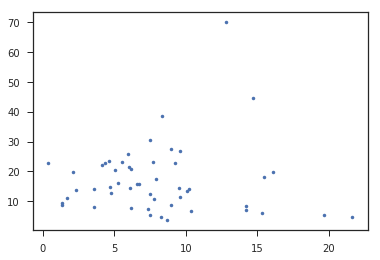

In [129]:
counts = []
ratios = []

for state in common_states:
    #print state
    counts.append(float(pay_count[state]['count_per_1000000'].loc[1990]))
    ratios.append(float(docs[docs['state_abb']==state]['ratio']))

print counts
print ratios
plt.plot(counts,ratios,marker='.',linewidth=0)
plt.show()

In [130]:
#output_notebook()

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,"
plot_s = figure(tools=TOOLS,
           toolbar_sticky=False)

#plot_s.toolbar.toolbar_sticky = False

plot_s.scatter(counts,ratios, radius=0.5,
          fill_color=plot_colors,
          line_color=None)

show(plot_s)

In [131]:
data[["LICNFELD","PRACTAGE","GRAD","PTAGE","PTGENDER","PTTYPE","WORKSTAT"]]

,LICNFELD,PRACTAGE,GRAD,PTAGE,PTGENDER,PTTYPE,WORKSTAT
0,10,60.0,1950.0,NaN,NaN,NaN,OK
1,10,40.0,1960.0,NaN,NaN,NaN,OK
2,15,30.0,1980.0,NaN,NaN,NaN,MA
3,10,40.0,1970.0,NaN,NaN,NaN,OK
4,10,40.0,1970.0,NaN,NaN,NaN,OK
5,10,40.0,1970.0,NaN,NaN,NaN,OK
6,10,30.0,1980.0,NaN,NaN,NaN,VA
7,10,70.0,1950.0,NaN,NaN,NaN,KY
8,30,60.0,1950.0,NaN,NaN,NaN,OH
9,30,40.0,1970.0,NaN,NaN,NaN,OH


In [132]:
gdp = pd.read_csv('GDP_by_state.csv', header=1, skiprows=3)
gdp.drop(labels=[60,61,62,63,64,65], axis=0,inplace=True)
state_abb2 =  []
for state in gdp['Area']:
    if state in state_pop.index:
        state_abb2.append(state_pop.loc[state]['State Abb'])
    else:
        state_abb2.append(state)

#state_abb2
gdp['state_abb']=state_abb2
gdp

,Fips,Area,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,state_abb
0,00000,United States,8542530.0,9024434.0,9595951.0,10219801.0,10556006.0,10910833.0,11440109.0,12200160.0,...,14320114.0,14859772.0,15406002.0,16041243.0,16576738.0,17312308.0,18007206.0,18509998.0,19263350.0,US
1,01000,Alabama,104218.0,109414.0,115015.0,119020.0,122822.0,127873.0,134388.0,146989.0,...,168315.0,174710.0,180665.0,185878.0,190319.0,193966.0,199804.0,204201.0,210954.0,AL
2,02000,Alaska,25446.0,24030.0,24684.0,26853.0,28553.0,29763.0,32039.0,35195.0,...,50463.0,54134.0,58759.0,60890.0,59808.0,58192.0,52448.0,50542.0,52789.0,AK
3,04000,Arizona,132708.0,143768.0,156145.0,165912.0,172288.0,179605.0,192685.0,204136.0,...,242509.0,245668.0,254192.0,264693.0,270469.0,281069.0,293318.0,304357.0,319850.0,AZ
4,05000,Arkansas,60417.0,62275.0,66715.0,68809.0,70849.0,74097.0,78774.0,85261.0,...,98020.0,102951.0,107287.0,109226.0,114456.0,117953.0,119081.0,121275.0,124918.0,AR
5,06000,California,1081444.0,1151119.0,1248006.0,1362995.0,1376163.0,1431267.0,1523473.0,1645084.0,...,1912115.0,1965886.0,2036297.0,2131199.0,2223892.0,2358920.0,2510167.0,2619639.0,2746873.0,CA
6,08000,Colorado,135868.0,150555.0,164835.0,181488.0,188108.0,193068.0,198811.0,204242.0,...,247270.0,253374.0,262719.0,272799.0,286835.0,305456.0,315621.0,323762.0,342748.0,CO
7,09000,Connecticut,140108.0,147911.0,154708.0,169004.0,175290.0,178017.0,183533.0,200407.0,...,233562.0,234528.0,234233.0,239462.0,240975.0,244612.0,253467.0,257038.0,260827.0,CT
8,10000,Delaware,33672.0,37298.0,41341.0,44851.0,47762.0,46985.0,48949.0,52376.0,...,57350.0,57471.0,59937.0,60628.0,61109.0,66298.0,69893.0,70927.0,73541.0,DE
9,11000,District of Columbia,51566.0,53802.0,57728.0,60059.0,64888.0,69060.0,72780.0,79040.0,...,98415.0,103831.0,107738.0,109685.0,111890.0,116400.0,121688.0,125871.0,131010.0,DC


In [133]:
GDP_2013 = []


for state in common_states:
    try:
        print state
        value = float(gdp[gdp['state_abb']== state]['2015'])
        print value
        GDP_2013.append(value)
    except:
        GDP_2013.append(np.nan)
print GDP_2013

AK
52448.0
AL
199804.0
AR
119081.0
AZ
293318.0
CA
2510167.0
CO
315621.0
CT
253467.0
DC
121688.0
DE
69893.0
FL
890884.0
GA
505693.0
HI
81900.0
IA
180511.0
ID
65670.0
IL
778353.0
IN
333436.0
KS
151677.0
KY
190832.0
LA
242059.0
MA
490402.0
MD
365162.0
ME
57242.0
MI
470289.0
MN
326221.0
MO
291764.0
MS
106207.0
MT
46179.0
NC
502077.0
ND
56253.0
NE
116111.0
NH
75162.0
NJ
563616.0
NM
92987.0
NV
142081.0
NY
1458253.0
OH
611350.0
OK
189612.0
OR
215940.0
PA
709722.0
PR
RI
56197.0
SC
202807.0
SD
47231.0
TN
317325.0
TX
1611958.0
UT
149515.0
VA
479669.0
VT
30299.0
WA
453186.0
WI
303826.0
WV
72583.0
WY
39474.0
[52448.0, 199804.0, 119081.0, 293318.0, 2510167.0, 315621.0, 253467.0, 121688.0, 69893.0, 890884.0, 505693.0, 81900.0, 180511.0, 65670.0, 778353.0, 333436.0, 151677.0, 190832.0, 242059.0, 490402.0, 365162.0, 57242.0, 470289.0, 326221.0, 291764.0, 106207.0, 46179.0, 502077.0, 56253.0, 116111.0, 75162.0, 563616.0, 92987.0, 142081.0, 1458253.0, 611350.0, 189612.0, 215940.0, 709722.0, nan, 56197.0

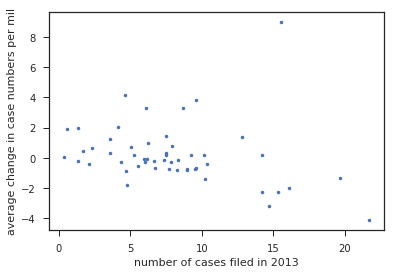

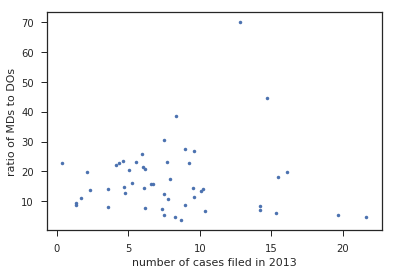

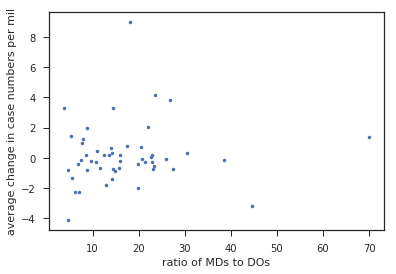

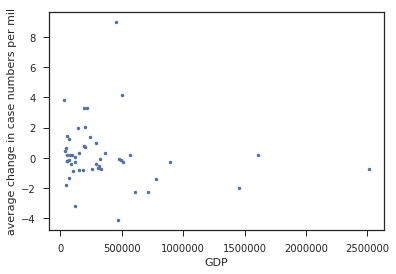

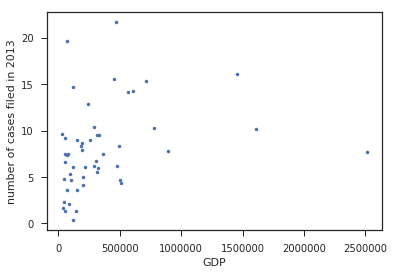

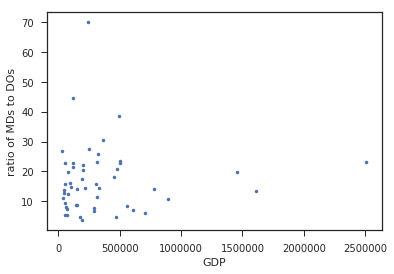

In [134]:
plt.plot(counts,slopes,marker='.',linewidth=0) #, color=plot_colors)
plt.xlabel('number of cases filed in 2013')
plt.ylabel('average change in case numbers per mil')
plt.show()

plt.plot(counts,ratios,marker='.',linewidth=0)
plt.xlabel('number of cases filed in 2013')
plt.ylabel('ratio of MDs to DOs')
plt.show()

plt.plot(ratios,slopes,marker='.',linewidth=0)
plt.xlabel('ratio of MDs to DOs')
plt.ylabel('average change in case numbers per mil')
plt.show()

plt.plot(GDP_2013,slopes,marker='.',linewidth=0)
plt.xlabel('GDP')
plt.ylabel('average change in case numbers per mil')
plt.show()

plt.plot(GDP_2013,counts,marker='.',linewidth=0)
plt.xlabel('GDP')
plt.ylabel('number of cases filed in 2013')
plt.show()

plt.plot(GDP_2013,ratios,marker='.',linewidth=0)
plt.xlabel('GDP')
plt.ylabel('ratio of MDs to DOs')
plt.show()

In [135]:
state_ratings = pd.read_csv('HOSArchive_Revised_Flatfiles_20131001/HCAHPS Measures - State.csv')

In [136]:
for column in state_ratings.columns:
    if 'nurse' in column:
        print column
    if 'doctor' in column:
        print column
    if 'hospital' in column:
        print column

Percent of patients who reported that their nurses 'Sometimes' or 'Never' communicated well.
Percent of patients who reported that their nurses 'Usually' communicated well.
Percent of patients who reported that their nurses 'Always' communicated well.
Percent of patients who reported that their doctors 'Sometimes' or 'Never' communicated well.
Percent of patients who reported that their doctors 'Usually' communicated well.
Percent of patients who reported that their doctors 'Always' communicated well.
Percent of patients at each hospital who reported that YES they were given information about what to do during recovery.
Percent of patients who gave their hospital a rating of 6 or lower on a scale from 0 (lowest) to 10 (highest).
Percent of patients who gave their hospital a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest).
Patients who gave their hospital a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest).
Percent of patients who reported NO they would not recomm

In [137]:
state_ratings

,State,Percent of patients who reported that their nurses 'Sometimes' or 'Never' communicated well.,Percent of patients who reported that their nurses 'Usually' communicated well.,Percent of patients who reported that their nurses 'Always' communicated well.,Percent of patients who reported that their doctors 'Sometimes' or 'Never' communicated well.,Percent of patients who reported that their doctors 'Usually' communicated well.,Percent of patients who reported that their doctors 'Always' communicated well.,Percent of patients who reported that they 'Sometimes' or 'Never' received help as soon as they wanted.,Percent of patients who reported that they 'Usually' received help as soon as they wanted.,Percent of patients who reported that they 'Always' received help as soon as they wanted.,...,Percent of patients who reported that the area around their room was 'Usually' quiet at night.,Percent of patients who reported that the area around their room was 'Always' quiet at night.,Percent of patients at each hospital who reported that YES they were given information about what to do during recovery.,Percent of patients who reported that they were not given information about what to do during their recovery at home.,Percent of patients who gave their hospital a rating of 6 or lower on a scale from 0 (lowest) to 10 (highest).,Percent of patients who gave their hospital a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest).,Patients who gave their hospital a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest).,Percent of patients who reported NO they would not recommend the hospital.,Percent of patients who reported YES they would probably recommend the hospital.,Patients who reported YES they would definitely recommend the hospital.
0,AK,4,19,77,4,14,82,7,24,69,...,31,59,85,15,8,26,66,4,26,70
1,AL,5,15,80,3,11,86,10,21,69,...,23,71,83,17,8,21,71,5,25,70
2,AR,5,17,78,4,13,83,9,23,68,...,25,67,82,18,8,22,70,6,25,69
3,AS,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,AZ,5,19,76,6,17,77,9,26,65,...,31,57,84,16,9,22,69,6,24,70
5,CA,6,20,74,6,16,78,13,26,61,...,32,51,83,17,10,23,67,7,24,69
6,CO,4,18,78,3,16,81,7,24,69,...,29,63,87,13,7,19,74,4,21,75
7,CT,5,18,77,5,16,79,11,25,64,...,32,53,84,16,9,23,68,6,23,71
8,DC,10,19,71,6,17,77,19,27,54,...,28,57,78,22,13,27,60,9,28,63
9,DE,4,17,79,5,17,78,9,24,67,...,33,52,84,16,8,24,68,5,26,69


state_ratings.rename(index=new_index_list,inplace=True)

In [138]:
hospital_ratings = pd.read_csv('HOSArchive_Revised_Flatfiles_20131001/HCAHPS Measures.csv')

In [139]:
hospital_ratings

,Provider Number,Hospital Name,Address 1,Address 2,Address 3,City,State,ZIP Code,County Name,Phone Number,...,Percent of patients who reported that they were not given information about what to do during their recovery at home.,Percent of patients who gave their hospital a rating of 6 or lower on a scale from 0 (lowest) to 10 (highest).,Percent of patients who gave their hospital a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest).,Patients who gave their hospital a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest).,Percent of patients who reported NO they would not recommend the hospital.,Percent of patients who reported YES they would probably recommend the hospital.,Patients who reported YES they would definitely recommend the hospital.,Number of completed Surveys,Survey Response Rate,Hospital Footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,NaN,NaN,DOTHAN,AL,36301,HOUSTON,3347938701,...,14,6,22,72,4,18,78,300 or more,33,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,NaN,NaN,BOAZ,AL,35957,MARSHALL,2565938310,...,12,6,17,77,4,22,74,300 or more,41,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,NaN,NaN,FLORENCE,AL,35631,LAUDERDALE,2567688400,...,23,16,29,55,8,41,51,300 or more,28,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,NaN,NaN,OPP,AL,36467,COVINGTON,3344933541,...,24,10,28,62,9,28,63,Between 100 and 299,31,NaN
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,NaN,NaN,LUVERNE,AL,36049,CRENSHAW,3343353374,...,18,9,25,66,8,29,63,Between 100 and 299,32,NaN
5,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,NaN,NaN,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,...,16,7,21,72,5,21,74,300 or more,34,NaN
6,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,NaN,NaN,FORT PAYNE,AL,35968,DE KALB,2568453150,...,17,7,25,68,6,31,63,300 or more,31,NaN
7,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,NaN,NaN,ALABASTER,AL,35007,SHELBY,2056208100,...,17,8,21,71,5,23,72,300 or more,29,NaN
8,10018,CALLAHAN EYE HOSPITAL,1720 UNIVERSITY BLVD,NaN,NaN,BIRMINGHAM,AL,35233,JEFFERSON,2053258100,...,16,1,8,91,1,1,98,Fewer than 100,41,Very few patients were eligible for the HCAHPS...
9,10019,HELEN KELLER MEMORIAL HOSPITAL,1300 SOUTH MONTGOMERY AVENUE,NaN,NaN,SHEFFIELD,AL,35660,COLBERT,2563864556,...,13,7,20,73,4,19,77,300 or more,30,NaN


In [140]:
import requests
import dill
from bs4 import BeautifulSoup
from datetime import datetime
import re

In [141]:
def scrape_table(state):
    hospital_info = []
    page = requests.get('https://www.ahd.com/states/hospital_'+state+'.html')
    soup = BeautifulSoup(page.text, "lxml")
    table = soup.select('table')
    table_rows = table[1].find_all('tr')
    for tr in table_rows[:-1]:
        td = tr.find_all('td')
        row = [i.text for i in td]
        hospital_info.append([state]+row)
    return hospital_info

In [142]:
hospital_info = scrape_table('VA')
hospital_df = pd.DataFrame(hospital_info)
hospital_df

,0,1,2,3,4,5,6
0,VA,None,None,None,None,None,None
1,VA,VCU Community Memorial Hospital,South Hill,225,"2,682","12,657","$281,831"
2,VA,633d Medical Group -Langley Air Force Base,Hampton,0,0,0,$0
3,VA,Augusta Health,Fishersville,199,"10,153","36,246","$939,107"
4,VA,Bon Secours DePaul Medical Center,Norfolk,129,"6,177","27,984","$713,575"
5,VA,Bon Secours Mary Immaculate Hospital,Newport News,230,"7,522","26,575","$654,831"
6,VA,Bon Secours Maryview Medical Center,Portsmouth,350,"10,444","53,143","$1,256,450"
7,VA,Buchanan General Hospital,Grundy,49,"1,120","5,599","$103,674"
8,VA,Capital Caring,Arlington,0,0,0,"$102,195"
9,VA,Carilion Franklin Memorial Hospital,Rocky Mount,37,"1,313","4,315","$132,461"


pickle.dump(hospital_df, open("hospital_df_MI.pck", "wb"))


In [143]:
common_states

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN',
       'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='|S3')

In [144]:
leftovers = ['ID', 'IL', 'IN', 
             'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MN', 'MO', 
             'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 
             'NV', 'OH', 'OK', 'OR', 'PR', 'RI', 'SC', 'SD', 
             'TN','TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

for el in leftovers:
    print el
    hospital_info = scrape_table(el)
    hospital_df = pd.DataFrame(hospital_info)
    print hospital_df
    pickle.dump(hospital_df, open("hospital_df_"+el+".pck", "wb"))


ID
     0                                                1              2     3  \
0   ID                                             None           None  None   
1   ID                          Boise VA Medical Center          Boise     0   
2   ID            Eastern Idaho Regional Medical Center    Idaho Falls   282   
3   ID                          Idaho Doctors' Hospital      Blackfoot     0   
4   ID                                  Kootenai Health  Coeur d'Alene   281   
5   ID                        Madison Memorial Hospital        Rexburg    67   
6   ID                           Mountain View Hospital    Idaho Falls    41   
7   ID                     Northwest Specialty Hospital     Post Falls    34   
8   ID                          Portneuf Medical Center      Pocatello   165   
9   ID           Saint Alphonsus Medical Center - Nampa          Nampa   151   
10  ID  Saint Alphonsus Regional Medical Center - Boise          Boise   393   
11  ID             Saint Joseph Regio

-rw-rw-r-- 1 derya derya 8.6K Jul 12 17:26 hospital_df_AZ.pck

-rw-rw-r-- 1 derya derya 6.7K Jul 12 17:26 hospital_df_AR.pck

-rw-rw-r-- 1 derya derya  11K Jul 12 17:26 hospital_df_AL.pck

-rw-rw-r-- 1 derya derya 2.0K Jul 12 17:26 hospital_df_AK.pck

-rw-rw-r-- 1 derya derya  13K Jul 12 13:48 hospital_df_MI.pck

-rw-rw-r-- 1 derya derya  21K Jul 12 13:47 hospital_df_PA.pck

-rw-rw-r-- 1 derya derya  23K Jul 12 13:46 hospital_df_NY.pck


In [145]:
gdp

,Fips,Area,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,state_abb
0,00000,United States,8542530.0,9024434.0,9595951.0,10219801.0,10556006.0,10910833.0,11440109.0,12200160.0,...,14320114.0,14859772.0,15406002.0,16041243.0,16576738.0,17312308.0,18007206.0,18509998.0,19263350.0,US
1,01000,Alabama,104218.0,109414.0,115015.0,119020.0,122822.0,127873.0,134388.0,146989.0,...,168315.0,174710.0,180665.0,185878.0,190319.0,193966.0,199804.0,204201.0,210954.0,AL
2,02000,Alaska,25446.0,24030.0,24684.0,26853.0,28553.0,29763.0,32039.0,35195.0,...,50463.0,54134.0,58759.0,60890.0,59808.0,58192.0,52448.0,50542.0,52789.0,AK
3,04000,Arizona,132708.0,143768.0,156145.0,165912.0,172288.0,179605.0,192685.0,204136.0,...,242509.0,245668.0,254192.0,264693.0,270469.0,281069.0,293318.0,304357.0,319850.0,AZ
4,05000,Arkansas,60417.0,62275.0,66715.0,68809.0,70849.0,74097.0,78774.0,85261.0,...,98020.0,102951.0,107287.0,109226.0,114456.0,117953.0,119081.0,121275.0,124918.0,AR
5,06000,California,1081444.0,1151119.0,1248006.0,1362995.0,1376163.0,1431267.0,1523473.0,1645084.0,...,1912115.0,1965886.0,2036297.0,2131199.0,2223892.0,2358920.0,2510167.0,2619639.0,2746873.0,CA
6,08000,Colorado,135868.0,150555.0,164835.0,181488.0,188108.0,193068.0,198811.0,204242.0,...,247270.0,253374.0,262719.0,272799.0,286835.0,305456.0,315621.0,323762.0,342748.0,CO
7,09000,Connecticut,140108.0,147911.0,154708.0,169004.0,175290.0,178017.0,183533.0,200407.0,...,233562.0,234528.0,234233.0,239462.0,240975.0,244612.0,253467.0,257038.0,260827.0,CT
8,10000,Delaware,33672.0,37298.0,41341.0,44851.0,47762.0,46985.0,48949.0,52376.0,...,57350.0,57471.0,59937.0,60628.0,61109.0,66298.0,69893.0,70927.0,73541.0,DE
9,11000,District of Columbia,51566.0,53802.0,57728.0,60059.0,64888.0,69060.0,72780.0,79040.0,...,98415.0,103831.0,107738.0,109685.0,111890.0,116400.0,121688.0,125871.0,131010.0,DC


In [146]:
docs

,state,population,totaldocs,docper100000,rank,mds,mdsper100000,dos,dosper100000,state_abb,ratio
0,United States,313914040,817850,260.5,NaN,759227,241.9,58409,18.6,US,12.998459
1,Alabama,4822023,9681,200.8,44.0,9259,192.0,419,8.7,AL,22.097852
2,Alaska,731449,1813,247.9,25.0,1642,224.5,171,23.4,AK,9.602339
3,Arizona,6553255,15133,230.9,32.0,13391,204.3,1738,26.5,AZ,7.704833
4,Arkansas,2949131,5629,190.9,48.0,5377,182.3,252,8.5,AR,21.337302
5,California,38041430,97977,257.6,20.0,93884,246.8,4063,10.7,CA,23.107064
6,Colorado,5187582,13869,267.3,16.0,12767,246.1,1098,21.2,CO,11.627505
7,Connecticut,3590347,11949,332.8,6.0,11527,321.1,420,11.7,CT,27.445238
8,Delaware,917092,2439,265.9,18.0,2149,234.3,289,31.5,DE,7.435986
9,District of Columbia,632323,5559,879.1,NaN,5435,859.5,122,19.3,DC,44.549180


In [147]:
state_ratings

,State,Percent of patients who reported that their nurses 'Sometimes' or 'Never' communicated well.,Percent of patients who reported that their nurses 'Usually' communicated well.,Percent of patients who reported that their nurses 'Always' communicated well.,Percent of patients who reported that their doctors 'Sometimes' or 'Never' communicated well.,Percent of patients who reported that their doctors 'Usually' communicated well.,Percent of patients who reported that their doctors 'Always' communicated well.,Percent of patients who reported that they 'Sometimes' or 'Never' received help as soon as they wanted.,Percent of patients who reported that they 'Usually' received help as soon as they wanted.,Percent of patients who reported that they 'Always' received help as soon as they wanted.,...,Percent of patients who reported that the area around their room was 'Usually' quiet at night.,Percent of patients who reported that the area around their room was 'Always' quiet at night.,Percent of patients at each hospital who reported that YES they were given information about what to do during recovery.,Percent of patients who reported that they were not given information about what to do during their recovery at home.,Percent of patients who gave their hospital a rating of 6 or lower on a scale from 0 (lowest) to 10 (highest).,Percent of patients who gave their hospital a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest).,Patients who gave their hospital a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest).,Percent of patients who reported NO they would not recommend the hospital.,Percent of patients who reported YES they would probably recommend the hospital.,Patients who reported YES they would definitely recommend the hospital.
0,AK,4,19,77,4,14,82,7,24,69,...,31,59,85,15,8,26,66,4,26,70
1,AL,5,15,80,3,11,86,10,21,69,...,23,71,83,17,8,21,71,5,25,70
2,AR,5,17,78,4,13,83,9,23,68,...,25,67,82,18,8,22,70,6,25,69
3,AS,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,AZ,5,19,76,6,17,77,9,26,65,...,31,57,84,16,9,22,69,6,24,70
5,CA,6,20,74,6,16,78,13,26,61,...,32,51,83,17,10,23,67,7,24,69
6,CO,4,18,78,3,16,81,7,24,69,...,29,63,87,13,7,19,74,4,21,75
7,CT,5,18,77,5,16,79,11,25,64,...,32,53,84,16,9,23,68,6,23,71
8,DC,10,19,71,6,17,77,19,27,54,...,28,57,78,22,13,27,60,9,28,63
9,DE,4,17,79,5,17,78,9,24,67,...,33,52,84,16,8,24,68,5,26,69


In [148]:
nurses = []
doctors = []

for column in state_ratings.columns:
    if 'nurse' in column:
        print column
        nurses.append(column)
    if 'doctor' in column:
        print column
        doctors.append(column)

Percent of patients who reported that their nurses 'Sometimes' or 'Never' communicated well.
Percent of patients who reported that their nurses 'Usually' communicated well.
Percent of patients who reported that their nurses 'Always' communicated well.
Percent of patients who reported that their doctors 'Sometimes' or 'Never' communicated well.
Percent of patients who reported that their doctors 'Usually' communicated well.
Percent of patients who reported that their doctors 'Always' communicated well.


In [149]:
non_existent = ["AL", "AK", "AZ", "AR", "DE", "GA", "HI", "ID", "IA", "KY", "LA", "MS", 
                "MO", "MT", "NH", "NM", "NC", "ND", "OK", "SD", "VA", "WV", "WI"] 
mandatory = ["CA", "CO", "CT", "DC", "FL", "IL", "IN", "KS", "ME", "MD", "MA", "MN", 
             "NV", "NJ", "NY", "OH", "PA", "RI", "SC", "TN", "TX", "UT", "VT", "WA"]
partial = ["OR", "WY"]
#no_info = ["PR"]
self_organized = ["MI"]
voluntary = ["NE"]

In [150]:
# non-existent 0
# mandatory 1
# partial 2
# self-organized 3
# voluntary is 4

dict_laws = {}
for i in non_existent:
    dict_laws[i] = (0,'non-existent')
for i in mandatory:
    dict_laws[i] = (1,'mandatory')
for i in partial:
    dict_laws[i] = (2,'partial')
for i in self_organized:
    dict_laws[i] = (3,'self-organized')
for i in voluntary:
    dict_laws[i] = (4,'voluntary')


In [151]:
state_pop

,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,State Abb
United States,308745538,308758105,309348193,311663358,313998379,316204908,318563456,320896618,323127513,US
Northeast,55317240,55318353,55388056,55632766,55829059,55988771,56116791,56184737,56209510,NE
Midwest,66927001,66929825,66978602,67153331,67332320,67543948,67726368,67838387,67941429,MW
South,114555744,114563005,114863114,116061801,117299171,118424320,119696311,121039206,122319574,SO
West,71945553,71946922,72118421,72815460,73537829,74247869,75023986,75834288,76657000,WE
Alabama,4779736,4780131,4785492,4799918,4815960,4829479,4843214,4853875,4863300,AL
Alaska,710231,710249,714031,722713,731089,736879,736705,737709,741894,AK
Arizona,6392017,6392301,6408312,6467163,6549634,6624617,6719993,6817565,6931071,AZ
Arkansas,2915918,2916025,2921995,2939493,2950685,2958663,2966912,2977853,2988248,AR
California,37253956,37254522,37332685,37676861,38011074,38335203,38680810,38993940,39250017,CA


In [152]:
df_state_slope_cluster_aslope_acolor

,state,slope_pay_per_case,slope_count_per_1000000,slope_total_pay,cluster,avg_slopes,cl_colors
0,AK,8321.941851,-0.203255,6.754667e+04,0,-0.128846,4.0
1,AL,7108.157358,2.025211,-6.274377e+04,1,1.949438,6.0
2,AR,10004.046375,-0.317074,2.903926e+05,0,-0.128846,4.0
3,AZ,8321.170539,0.962205,9.005864e+05,0,-0.128846,4.0
4,CA,4825.125569,-0.782451,2.424531e+05,0,-0.128846,4.0
5,CO,9293.988498,-0.664984,5.577813e+05,0,-0.128846,4.0
6,CT,14683.618435,-0.742375,1.097702e+06,0,-0.128846,4.0
7,DC,3311.312423,-3.223822,-6.302341e+05,2,-3.223822,1.0
8,DE,10083.690040,-0.160951,-1.967924e+04,0,-0.128846,4.0
9,FL,2107.915479,-0.289428,-4.791743e+05,0,-0.128846,4.0


In [153]:
pay_count

AK                                           AL  \
       pay_per_case count_per_1000000   total_pay   pay_per_case   
1990            NaN          1.347901         0.0  166966.666667   
1991  196140.625000         41.784945   3138250.0  121558.333333   
1992  105808.333333         59.307664   3174250.0  217455.555556   
1993  130986.764706         67.395073   4453550.0  230903.448276   
1994   85071.428571         59.307664   2382000.0  254741.666667   
1995  178137.500000         43.132846   3562750.0  281157.894737   
1996  151242.857143         52.568157   5293500.0  405196.236559   
1997  158375.000000         36.393339   3167500.0  225808.988764   
1998  286718.750000         52.568157   6881250.0  296460.674157   
1999  270546.296296         94.353102   7304750.0  274947.887324   
2000  159310.344828        172.531386   4620000.0  367873.529412   
2001  240925.000000         48.524452   7227750.0  244472.727273   
2002  210240.384615         40.437044   5466250.0  233686.781609   
2003  241908.333333         57.959762   7257250.0  212584.027778   
2004  189822.000000         47.176551   4745550.0  211181.818182   
2005  737932.692308         48.524452  19186250.0  223898.305085   
2006  187931.818182         44.480748   4134500.0  281934.375000   
2007  482916.666667         33.697536   5795000.0  182864.912281   
2008  193289.473684         44.480748   3672500.0  310454.545455   
2009  229140.625000         40.437044   3666250.0  306960.000000   
2010  615511.904762         51.220255  12925750.0  282437.500000   
2011  419333.333333         53.916058   6290000.0  250020.833333   
2012  361029.411765         49.872354   6137500.0  317812.500000   
2013  289482.142857         62.003467   4052750.0  454377.659574   
2014  270666.666667         78.178284   4060000.0  637780.172414   
2015  334264.705882         60.655565   5682500.0  308533.653846   
2016  208750.000000         47.176551   2922500.0  426599.000000   
2017  251363.636364         62.003467   5530000.0  402366.071429   

                                               AR                    \
     count_per_1000000   total_pay   pay_per_case count_per_1000000   
1990          4.112434   2504500.0   81357.142857          6.023596   
1991         23.646495   9481550.0   83832.258065         39.488021   
1992         23.440873  15656800.0  226307.065217         39.822665   
1993         26.525199  20088600.0  126375.000000         37.145511   
1994         24.468982  19869850.0  116544.871795         32.795136   
1995         25.497090  21368000.0  107418.354430         35.806934   
1996         25.291469  37683250.0  105860.000000         36.476223   
1997         28.581416  20097000.0   96891.791045         35.472290   
1998         31.871363  26385000.0  178015.789474         49.861993   
1999         30.637633  19521300.0  187451.219512         41.495887   
2000        330.434067  37523100.0  225487.654321         80.314619   
2001        116.998746  24202800.0  169092.233010         67.263494   
2002        137.355294  20330750.0  226741.818182         65.590272   
2003        137.766537  15306050.0  326037.974684         71.948513   
2004        154.421895  16261000.0  261940.229885         38.484088   
2005        163.058006  13210000.0  295718.085106         37.480156   
2006        179.096498  18043800.0  213264.492754         33.464425   
2007        179.918985  10423300.0  259293.103448         31.456559   
2008         67.443917  17075000.0  319433.035714         29.448694   
2009         42.152448  15348000.0  330504.098361         36.476223   
2010        204.593589  14686750.0  291380.434783         32.125848   
2011        190.611313  12001000.0  304291.666667         53.208435   
2012         82.043057  13983750.0  252745.833333         40.157310   
2013         45.236773  21355750.0  309718.181818         33.464425   
2014         41.124339  36991250.0  383099.137931         35.806934   
2015         53.256020  16043750.0  318035.000000         3

In [154]:
float(state_pop[state_pop['State Abb']=='AZ']["2013"])

6624617.0

In [155]:
gdp

,Fips,Area,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,state_abb
0,00000,United States,8542530.0,9024434.0,9595951.0,10219801.0,10556006.0,10910833.0,11440109.0,12200160.0,...,14320114.0,14859772.0,15406002.0,16041243.0,16576738.0,17312308.0,18007206.0,18509998.0,19263350.0,US
1,01000,Alabama,104218.0,109414.0,115015.0,119020.0,122822.0,127873.0,134388.0,146989.0,...,168315.0,174710.0,180665.0,185878.0,190319.0,193966.0,199804.0,204201.0,210954.0,AL
2,02000,Alaska,25446.0,24030.0,24684.0,26853.0,28553.0,29763.0,32039.0,35195.0,...,50463.0,54134.0,58759.0,60890.0,59808.0,58192.0,52448.0,50542.0,52789.0,AK
3,04000,Arizona,132708.0,143768.0,156145.0,165912.0,172288.0,179605.0,192685.0,204136.0,...,242509.0,245668.0,254192.0,264693.0,270469.0,281069.0,293318.0,304357.0,319850.0,AZ
4,05000,Arkansas,60417.0,62275.0,66715.0,68809.0,70849.0,74097.0,78774.0,85261.0,...,98020.0,102951.0,107287.0,109226.0,114456.0,117953.0,119081.0,121275.0,124918.0,AR
5,06000,California,1081444.0,1151119.0,1248006.0,1362995.0,1376163.0,1431267.0,1523473.0,1645084.0,...,1912115.0,1965886.0,2036297.0,2131199.0,2223892.0,2358920.0,2510167.0,2619639.0,2746873.0,CA
6,08000,Colorado,135868.0,150555.0,164835.0,181488.0,188108.0,193068.0,198811.0,204242.0,...,247270.0,253374.0,262719.0,272799.0,286835.0,305456.0,315621.0,323762.0,342748.0,CO
7,09000,Connecticut,140108.0,147911.0,154708.0,169004.0,175290.0,178017.0,183533.0,200407.0,...,233562.0,234528.0,234233.0,239462.0,240975.0,244612.0,253467.0,257038.0,260827.0,CT
8,10000,Delaware,33672.0,37298.0,41341.0,44851.0,47762.0,46985.0,48949.0,52376.0,...,57350.0,57471.0,59937.0,60628.0,61109.0,66298.0,69893.0,70927.0,73541.0,DE
9,11000,District of Columbia,51566.0,53802.0,57728.0,60059.0,64888.0,69060.0,72780.0,79040.0,...,98415.0,103831.0,107738.0,109685.0,111890.0,116400.0,121688.0,125871.0,131010.0,DC


In [156]:
state_ratings

,State,Percent of patients who reported that their nurses 'Sometimes' or 'Never' communicated well.,Percent of patients who reported that their nurses 'Usually' communicated well.,Percent of patients who reported that their nurses 'Always' communicated well.,Percent of patients who reported that their doctors 'Sometimes' or 'Never' communicated well.,Percent of patients who reported that their doctors 'Usually' communicated well.,Percent of patients who reported that their doctors 'Always' communicated well.,Percent of patients who reported that they 'Sometimes' or 'Never' received help as soon as they wanted.,Percent of patients who reported that they 'Usually' received help as soon as they wanted.,Percent of patients who reported that they 'Always' received help as soon as they wanted.,...,Percent of patients who reported that the area around their room was 'Usually' quiet at night.,Percent of patients who reported that the area around their room was 'Always' quiet at night.,Percent of patients at each hospital who reported that YES they were given information about what to do during recovery.,Percent of patients who reported that they were not given information about what to do during their recovery at home.,Percent of patients who gave their hospital a rating of 6 or lower on a scale from 0 (lowest) to 10 (highest).,Percent of patients who gave their hospital a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest).,Patients who gave their hospital a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest).,Percent of patients who reported NO they would not recommend the hospital.,Percent of patients who reported YES they would probably recommend the hospital.,Patients who reported YES they would definitely recommend the hospital.
0,AK,4,19,77,4,14,82,7,24,69,...,31,59,85,15,8,26,66,4,26,70
1,AL,5,15,80,3,11,86,10,21,69,...,23,71,83,17,8,21,71,5,25,70
2,AR,5,17,78,4,13,83,9,23,68,...,25,67,82,18,8,22,70,6,25,69
3,AS,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
4,AZ,5,19,76,6,17,77,9,26,65,...,31,57,84,16,9,22,69,6,24,70
5,CA,6,20,74,6,16,78,13,26,61,...,32,51,83,17,10,23,67,7,24,69
6,CO,4,18,78,3,16,81,7,24,69,...,29,63,87,13,7,19,74,4,21,75
7,CT,5,18,77,5,16,79,11,25,64,...,32,53,84,16,9,23,68,6,23,71
8,DC,10,19,71,6,17,77,19,27,54,...,28,57,78,22,13,27,60,9,28,63
9,DE,4,17,79,5,17,78,9,24,67,...,33,52,84,16,8,24,68,5,26,69


In [157]:
statutes_caps = pd.read_csv('statute_of_limitations_new.csv')

In [158]:
cols_stat_caps = {}
for key, value in zip(statutes_caps.columns,['state',
                                             'time_after_treatment',
                                             'time_after_discovery',
                                             'max_time','cap',
                                             'cap_death_injury']):
    cols_stat_caps[key]=value

In [159]:
statutes_caps.rename(columns=cols_stat_caps,inplace=True)

In [160]:
state_abb3 =  []
for state in statutes_caps['state']:
    if state in state_pop.index:
        state_abb3.append(state_pop.loc[state]['State Abb'])
    else:
        state_abb3.append(state)

#state_abb2
statutes_caps['state_abb']=state_abb3
statutes_caps

,state,time_after_treatment,time_after_discovery,max_time,cap,cap_death_injury,state_abb
0,Alabama,2.0,0.5,4.0,10000000,10000000,AL
1,Alaska,2.0,2.0,100.0,250000,400000,AK
2,Arizona,2.0,2.0,100.0,10000000,10000000,AZ
3,Arkansas,2.0,0.0,2.0,10000000,10000000,AR
4,California,1.0,1.0,3.0,250000,250000,CA
5,Colorado,2.0,2.0,3.0,300000,1000000,CO
6,Connecticut,2.0,2.0,3.0,10000000,10000000,CT
7,Delaware,2.0,1.0,3.0,10000000,10000000,DE
8,District of Columbia,3.0,3.0,100.0,10000000,10000000,DC
9,Florida,2.0,2.0,4.0,500000,1000000,FL


In [164]:
## TRY ALL FOR 2013:

list_for_RFR = []
col_names = ['state','gdp','population','md2do',
             'nurses_never','nurses_usually','nurses_always',
             'doctors_never','doctors_usually','doctors_always',
             'error_disc',
             'slope_pay_per_case','slope_count_per_1000000','slope_total_pay',
             'time_after_treatment','time_after_discovery','max_time','cap','cap_death_injury',
             'count','mean_cost','total_cost']

for state in common_states:
    try:
        row = []
        row.append(state)
        row.append(1000000.0*float(gdp[gdp['state_abb']==state]["2013"])/float(state_pop[state_pop['State Abb']==state]["2013"]))
        row.append(float(state_pop[state_pop['State Abb']==state]["2016"]))
        row.append(float(docs[docs['state_abb']==state]["ratio"]))
        for col in nurses:
            row.append(float(state_ratings[state_ratings['State']==state][col]))
        for col in doctors:
            row.append(float(state_ratings[state_ratings['State']==state][col]))
        row.append(dict_laws[state][0])
        row.append(float(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor['state']==state]['slope_pay_per_case']))
        row.append(float(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor['state']==state]['slope_count_per_1000000']))
        row.append(float(df_state_slope_cluster_aslope_acolor[df_state_slope_cluster_aslope_acolor['state']==state]['slope_total_pay']))
        row.append(float(statutes_caps[statutes_caps['state_abb']==state]['time_after_treatment']))
        row.append(float(statutes_caps[statutes_caps['state_abb']==state]['time_after_discovery']))
        row.append(float(statutes_caps[statutes_caps['state_abb']==state]['max_time']))
        row.append(float(statutes_caps[statutes_caps['state_abb']==state]['cap']))
        row.append(float(statutes_caps[statutes_caps['state_abb']==state]['cap_death_injury']))
        row.append(pay_count[state,'count_per_1000000'].loc[2013])
        row.append(pay_count[state,'pay_per_case'].loc[2013])
        row.append(pay_count[state,'total_pay'].loc[2013])
        list_for_RFR.append(row)
    except:
        print "Issue with state " + state

df_RFR = pd.DataFrame(list_for_RFR,columns=col_names)
df_RFR

Issue with state NE
Issue with state PR


,state,gdp,population,md2do,nurses_never,nurses_usually,nurses_always,doctors_never,doctors_usually,doctors_always,...,slope_count_per_1000000,slope_total_pay,time_after_treatment,time_after_discovery,max_time,cap,cap_death_injury,count,mean_cost,total_cost
0,AK,81163.936006,741894.0,9.602339,4.0,19.0,77.0,4.0,14.0,82.0,...,-0.203255,6.754667e+04,2.0,2.0,100.0,250000.0,400000.0,62.003467,289482.142857,4052750.0
1,AL,39407.770486,4863300.0,22.097852,5.0,15.0,80.0,3.0,11.0,86.0,...,2.025211,-6.274377e+04,2.0,0.5,4.0,10000000.0,10000000.0,45.236773,454377.659574,21355750.0
2,AR,38685.041182,2988248.0,21.337302,5.0,17.0,78.0,4.0,13.0,83.0,...,-0.317074,2.903926e+05,2.0,0.0,2.0,10000000.0,10000000.0,33.464425,309718.181818,17034500.0
3,AZ,40827.869747,6931071.0,7.704833,5.0,19.0,76.0,6.0,17.0,77.0,...,0.962205,9.005864e+05,2.0,2.0,100.0,10000000.0,10000000.0,56.124082,307473.300971,63339500.0
4,CA,58011.744453,39250017.0,23.107064,6.0,20.0,74.0,6.0,16.0,78.0,...,-0.782451,2.424531e+05,1.0,1.0,3.0,250000.0,250000.0,55.566855,200241.532258,248299500.0
5,CO,54452.660916,5540545.0,11.627505,4.0,18.0,78.0,3.0,16.0,81.0,...,-0.664984,5.577813e+05,2.0,2.0,3.0,300000.0,1000000.0,48.912156,295289.024390,36320550.0
6,CT,67011.901825,3576452.0,27.445238,5.0,18.0,77.0,5.0,16.0,79.0,...,-0.742375,1.097702e+06,2.0,2.0,3.0,10000000.0,10000000.0,58.717410,396073.275862,45944500.0
7,DC,172359.877689,681170.0,44.549180,10.0,19.0,71.0,6.0,17.0,77.0,...,-3.223822,-6.302341e+05,3.0,3.0,100.0,10000000.0,10000000.0,51.382181,351458.333333,6326250.0
8,DE,66035.584804,952065.0,7.435986,4.0,17.0,79.0,5.0,17.0,78.0,...,-0.160951,-1.967924e+04,2.0,1.0,3.0,10000000.0,10000000.0,40.963590,358392.857143,7526250.0
9,FL,40580.283282,20612439.0,10.721382,7.0,19.0,74.0,6.0,17.0,77.0,...,-0.289428,-4.791743e+05,2.0,2.0,4.0,500000.0,1000000.0,51.231201,199572.298137,160655700.0


In [470]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg as df


def features_bar(order,xs,ys,yerrs):
    feature_dict = {'gdp': 'GDP', 
                'population': "Population", 
                'md2do': "MD:DO Ratio", 
                'nurses_never': "Nurse Comm. Never",
                'nurses_usually': "Nurses Comm. Usually",
                'nurses_always': "Nurses Comm. Always",
                'doctors_never': "Doctors Comm. Never",
                'doctors_usually': "Doctors Comm. Usually",
                'doctors_always': "Doctors Comm. Always",
                'error_disc': "Error Disclosure",
                'time_after_treatment': "Time All. Aft. Treatment",
                'time_after_discovery': "Time All. Aft. Discovery",
                'max_time': "Maximum Time All.",
                'cap': "Payout Cap",
                'cap_death_injury': "Payout Cap (Death/Serious Injury)"}
    p = figure(plot_width=500, plot_height=700, y_axis_label='Feature Importance',
           y_range= ranges.Range1d(start=0,end=0.35))
    p.yaxis.axis_label_text_font_size = "15pt"
    base, lower, upper = [], [], []
    err_xs = []
    err_ys_low = []
    err_ys_up = []
    #xs=range(X.shape[1])
    #ys=importances[indices]
    #yerrs=std[indices]
    for x, y, yerr in zip(xs, ys, yerrs):
        err_xs.append(x)
        err_ys_low.append(y - yerr)
        err_ys_up.append(y + yerr)
    base = xs
    lower = err_ys_low
    upper = err_ys_up
    source_error = ColumnDataSource(data=dict(base=base, x=features, lower=lower, upper=upper, values=ys))
    p.vbar(source=source_error,x='base',top='values',bottom=0,width=0.8,color='firebrick')
    p.add_layout(Whisker(source=source_error, base="base", upper="upper", lower="lower", level='overlay'))
    p.xaxis.ticker = base
    label_dict = {}
    for num,label in zip(base,order):
        label_dict[num]=feature_dict[label]
    p.xaxis.major_label_overrides = label_dict
    p.xaxis.major_label_orientation = np.pi/4
    p.xaxis.major_label_text_font_size = "12pt"
    return(p)

In [523]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=20, max_depth=10)
features_list = ['gdp', #'population',
                 'md2do',
             'nurses_never','nurses_usually','nurses_always',
             'doctors_never','doctors_usually','doctors_always',
             #'error_disc',
             'time_after_treatment','time_after_discovery','max_time','cap','cap_death_injury']
X = df_RFR[features_list]
y = df_RFR[['mean_cost']]#'total_cost']] #'count']] #,'total_cost','mean_cost']]
forest.fit(X,y)
y_predict = forest.predict(X)
print "score"
print forest.score(X,y)

importances = forest.feature_importances_
std = scipy.stats.sem([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], features_list[indices[f]]))

order = [features_list[indices[f]] for f in range(X.shape[1])]
xs=range(X.shape[1])
ys=importances[indices]
yerrs=std[indices]

pickle.dump([order,xs,ys,yerrs], open("mean_cost_features_mean_cost.pck", "wb"),protocol=2)

bar1 = features_bar(order,xs,ys,yerrs)
show(bar1)

/home/derya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/derya/anaconda2/lib/python2.7/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('base', 13), ('lower', 13), ('upper', 13), ('values', 13), ('x', 323)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


score
0.85765843704
Feature ranking:
1. feature 11 (0.287064) cap
2. feature 9 (0.196261) time_after_discovery
3. feature 0 (0.126008) gdp
4. feature 12 (0.099205) cap_death_injury
5. feature 3 (0.076646) nurses_usually
6. feature 1 (0.046752) md2do
7. feature 6 (0.030491) doctors_usually
8. feature 2 (0.027521) nurses_never
9. feature 8 (0.024938) time_after_treatment
10. feature 7 (0.024704) doctors_always
11. feature 4 (0.020854) nurses_always
12. feature 5 (0.020814) doctors_never
13. feature 10 (0.018741) max_time


In [524]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=20, max_depth=10)
features_list = ['gdp', #'population',
                 'md2do',
             'nurses_never','nurses_usually','nurses_always',
             'doctors_never','doctors_usually','doctors_always',
             #'error_disc',
             'time_after_treatment','time_after_discovery','max_time','cap','cap_death_injury']
X = df_RFR[features_list]
y = df_RFR[['count']]#'total_cost']] #'count']] #,'total_cost','mean_cost']]
forest.fit(X,y)
y_predict = forest.predict(X)
print "score"
print forest.score(X,y)

importances = forest.feature_importances_
std = scipy.stats.sem([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], features_list[indices[f]]))

order = [features_list[indices[f]] for f in range(X.shape[1])]
xs=range(X.shape[1])
ys=importances[indices]
yerrs=std[indices]

pickle.dump([order,xs,ys,yerrs], open("mean_cost_features_count.pck", "wb"),protocol=2)

bar2 = features_bar(order,xs,ys,yerrs)
#show(bar2)

score
0.829136596757
Feature ranking:
1. feature 1 (0.210208) md2do
2. feature 10 (0.203881) max_time
3. feature 0 (0.119307) gdp
4. feature 11 (0.088585) cap
5. feature 9 (0.055833) time_after_discovery
6. feature 3 (0.053468) nurses_usually
7. feature 2 (0.049928) nurses_never
8. feature 6 (0.049862) doctors_usually
9. feature 12 (0.047674) cap_death_injury
10. feature 8 (0.045518) time_after_treatment
11. feature 7 (0.034673) doctors_always
12. feature 4 (0.021524) nurses_always
13. feature 5 (0.019539) doctors_never


/home/derya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/derya/anaconda2/lib/python2.7/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('base', 13), ('lower', 13), ('upper', 13), ('values', 13), ('x', 323)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [525]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=20, max_depth=10)
features_list = ['gdp', #'population',
                 'md2do',
             'nurses_never','nurses_usually','nurses_always',
             'doctors_never','doctors_usually','doctors_always',
             #'error_disc',
             'time_after_treatment','time_after_discovery','max_time','cap','cap_death_injury']
X = df_RFR[features_list]
y = df_RFR[['total_cost']]#'total_cost']] #'count']] #,'total_cost','mean_cost']]
forest.fit(X,y)
y_predict = forest.predict(X)
print "score"
print forest.score(X,y)

importances = forest.feature_importances_
std = scipy.stats.sem([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], features_list[indices[f]]))

order = [features_list[indices[f]] for f in range(X.shape[1])]
xs=range(X.shape[1])
ys=importances[indices]
yerrs=std[indices]

pickle.dump([order,xs,ys,yerrs], open("mean_cost_features_total_cost.pck", "wb"),protocol=2)

bar3 = features_bar(order,xs,ys,yerrs)
#show(bar3)

score
0.800432885412
Feature ranking:
1. feature 10 (0.149689) max_time
2. feature 1 (0.112246) md2do
3. feature 7 (0.108072) doctors_always
4. feature 0 (0.101751) gdp
5. feature 4 (0.099528) nurses_always
6. feature 2 (0.086672) nurses_never
7. feature 8 (0.070095) time_after_treatment
8. feature 3 (0.059169) nurses_usually
9. feature 12 (0.055403) cap_death_injury
10. feature 6 (0.053390) doctors_usually
11. feature 5 (0.038885) doctors_never
12. feature 11 (0.037904) cap
13. feature 9 (0.027196) time_after_discovery


/home/derya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/derya/anaconda2/lib/python2.7/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('base', 13), ('lower', 13), ('upper', 13), ('values', 13), ('x', 323)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


In [481]:
df_RFR.columns

Index([u'state', u'gdp', u'population', u'md2do', u'nurses_never',
       u'nurses_usually', u'nurses_always', u'doctors_never',
       u'doctors_usually', u'doctors_always', u'error_disc',
       u'slope_pay_per_case', u'slope_count_per_1000000', u'slope_total_pay',
       u'time_after_treatment', u'time_after_discovery', u'max_time', u'cap',
       u'cap_death_injury', u'count', u'mean_cost', u'total_cost'],
      dtype='object')

In [526]:
state = "TX"
df_mean_cost = pd.DataFrame(df_RFR[["state","mean_cost"]].sort_values('mean_cost').values, columns=["State","Average Payout [$]"])
pickle.dump(df_mean_cost, open("df_mean_cost.pck", "wb"),protocol=2)
print state, df_mean_cost[df_mean_cost["State"]==state].index[0]
df_count = pd.DataFrame(df_RFR[["state","count"]].sort_values('count').values, columns=["State","Number of Cases Per Million"])
pickle.dump(df_count, open("df_count.pck", "wb"),protocol=2)
print state, df_count[df_count["State"]==state].index[0]
df_total_cost = pd.DataFrame(df_RFR[["state","total_cost"]].sort_values('total_cost').values, columns=["State","Total Payout [$]"])
pickle.dump(df_total_cost, open("df_total_cost.pck", "wb"),protocol=2)
print state, df_total_cost[df_total_cost["State"]==state].index[0]


TX 1
TX 23
TX 39


In [513]:
from bokeh.models import ColumnDataSource
from bokeh.models.widgets import DataTable, TableColumn, HTMLTemplateFormatter
from bokeh.io import show

def datatable(df):
    source = ColumnDataSource(data=df)
    formater =  HTMLTemplateFormatter(template=template)
    columns = [TableColumn(field=df.columns[0], title=df.columns[0]),
               TableColumn(field=df.columns[1], title=df.columns[1])]
    data_table = DataTable(source=source, columns=columns, width=400)
    return data_table


In [514]:
mean_cost_table = datatable(df_mean_cost)
show(mean_cost_table)

## FIRST ATTEMPT AT EXTRACTING FEATURE IMPORTANCE (AS RECORD):

score
0.618963673437
Feature ranking:
1. feature 0 (0.215650) gdp
2. feature 10 (0.188649) max_time
3. feature 1 (0.149503) md2do
4. feature 12 (0.077288) cap_death_injury
5. feature 3 (0.064406) nurses_usually
6. feature 7 (0.053412) doctors_always
7. feature 5 (0.052460) doctors_never
8. feature 9 (0.043590) time_after_discovery
9. feature 11 (0.040962) cap

/home/derya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



10. feature 4 (0.040876) nurses_always
11. feature 2 (0.039780) nurses_never
12. feature 6 (0.020140) doctors_usually
13. feature 8 (0.013283) time_after_treatment


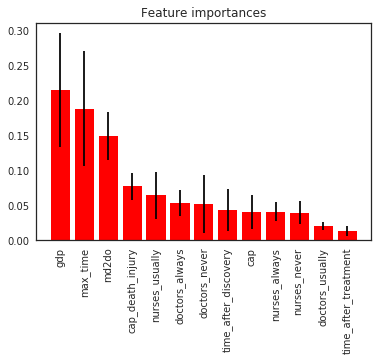

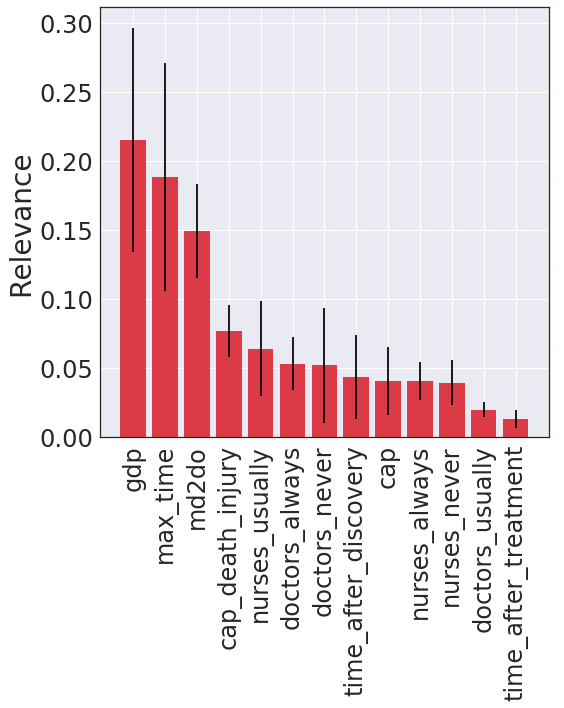

/home/derya/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


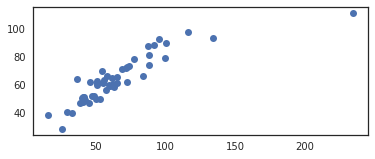

In [170]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, max_depth=15)
features_list = ['gdp', #'population',
                 'md2do',
                 'nurses_never','nurses_usually','nurses_always',
                 'doctors_never','doctors_usually','doctors_always',
                 #'error_disc',
                 'time_after_treatment','time_after_discovery','max_time','cap','cap_death_injury']
X = df_RFR[features_list]
y = df_RFR[['count']]#'total_cost']] #'count']] #,'total_cost','mean_cost']]
forest.fit(X,y)
y_predict = forest.predict(X)
print "score"
print forest.score(X,y)

importances = forest.feature_importances_
std = scipy.stats.sem([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], features_list[indices[f]]))

# Plot the feature importances of the forest
sns.set_style()
features = [features_list[i] for i in indices]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features,rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

sns.set_style("darkgrid")

fig, ax1 = plt.subplots(figsize=(8,10))
ax1.bar(range(X.shape[1]),importances[indices],color=current_palette[6],yerr=std[indices], align="center")
#ax1.set_xlabel('Features',fontsize=30)
plt.xticks(range(X.shape[1]), features,rotation='vertical')
ax1.tick_params(axis='x',labelsize=24)
ax1.set_ylabel('Relevance',fontsize=28)
ax1.tick_params(axis='y',labelsize=24)

sns.set_style("white")
ax2 = ax1.twinx()
#ax2.plot(years,[pay/1000. for pay in payments],color=current_palette[6],marker='o',markersize=12,linewidth=4)
#ax2.set_ylabel('Average Payout Per Case [$1000]',fontsize=32)
ax2.tick_params(axis='y',labelsize=0,labelcolor=current_palette[6])
#ax2.set_ylim(100,350)
fig.tight_layout()
#sns.despine()

#plt.savefig('total_numbers_costs_across_us.jpg',dpi=100)
plt.show()

plt.plot(y,y_predict,marker='o',linewidth=0)
plt.axes().set_aspect('equal')
plt.show()

In [171]:
forest = RandomForestRegressor(n_estimators=50, max_depth=50)
features_list = ['gdp', #'population',
                 'md2do',
             'nurses_never','nurses_usually','nurses_always',
             'doctors_never','doctors_usually','doctors_always',
             #'error_disc',
             'time_after_treatment','time_after_discovery','max_time','cap','cap_death_injury']
X = df_RFR[features_list]
y = df_RFR[['count']]#'total_cost']] #'count']] #,'total_cost','mean_cost']]
#forest.fit(X,y)
print forest.get_params()

from sklearn import model_selection
gs = model_selection.GridSearchCV(
    forest,
    {"max_depth": range(5,35,5), "n_estimators": range(5,35,5)},
    cv=5,  # 5-fold cross validation
    n_jobs=2,  # run each hyperparameter in one of two parallel jobs
    scoring='neg_mean_squared_error'
)
gs.fit(X, y)
print gs.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [442]:
from bokeh.models import ColumnDataSource, Whisker
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg as df

colors = ["red", "olive", "darkred", "goldenrod", "skyblue", "orange", "salmon"]

p = figure(plot_width=500, plot_height=500, y_axis_label='Feature Importance',
           y_range= ranges.Range1d(start=0,end=0.3))
p.yaxis.axis_label_text_font_size = "15pt"
base, lower, upper = [], [], []

err_xs = []
err_ys_low = []
err_ys_up = []

xs=range(X.shape[1])
ys=importances[indices]
yerrs=std[indices]

for x, y, yerr in zip(xs, ys, yerrs):
    err_xs.append(x)
    err_ys_low.append(y - yerr)
    err_ys_up.append(y + yerr)
    
base = xs
lower = err_ys_low
upper = err_ys_up
                  
source_error = ColumnDataSource(data=dict(base=base, x=features, lower=lower, upper=upper, values=ys))

p.vbar(source=source_error,x='base',top='values',bottom=0,width=0.4,color='firebrick')
p.add_layout(
    Whisker(source=source_error, base="base", upper="upper", lower="lower", level='overlay')
)

p.xaxis.ticker = base
label_dict = {}
for num,label in zip(base,features):
    label_dict[num]=label

p.xaxis.major_label_overrides = label_dict
p.xaxis.major_label_orientation = np.pi/4
p.xaxis.major_label_text_font_size = "15pt"

show(p)